# Sklearn Random Forest Regression for dp0 data

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:


%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle

### Import data

In [6]:
date = "20230104"

In [42]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
csv_file = r"D:\cdu\data\zonal_stats\output\20230104\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(date)


## Set output file locations

In [43]:
output_ = r"D:\cdu\data\zonal_stats\output\{0}".format(date)

In [44]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(167, 183)
['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_

In [45]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [46]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [47]:
print(list(df2.columns))

['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', '

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 183 entries, uid to MSRm
dtypes: float64(156), int64(25), object(2)
memory usage: 238.9+ KB


### Set variables to plot

In [49]:
# predicted value is x
value_x = 'bio_agb_kg1ha'
# variable is y
value_y = "fpca2_p50"
value_a = 'h99a2_p95'
value_b = 'stc_med'


In [50]:
value_y

'fpca2_p50'

In [51]:
df2.shape

(167, 183)

In [52]:

# Output to file
output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
            title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


#Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

#print(test)
# Format the tooltip
tooltips = [
            ('Site', '@site'),
            ('Date', '@date'),
            (value_x, '@{0}'.format(value_x)),
            (value_y, '@{0}'.format(value_y)),   
            (value_a, '@{0}'.format(value_a)),
            (value_b, '@{0}'.format(value_b)) 
           ]

# Create the figure
fig = figure(plot_height=400,
             plot_width=1500,
             y_axis_label= value_y.replace("_", " "), 
             x_axis_label= value_x.replace("_", " "),
             title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
             toolbar_location='below',
             tools=select_tools)

# # Format the y-axis tick label
fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# Add square representing each site
fig.square(x= value_x,
           y= value_y,
           source=df2.round(4),
           size=5,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualize
show(fig)

### Drop AGB numbers which are high

In [53]:
# # drop the 7 tern sites that apear to be outliers
# df3 =df2[df2[value_x] <= 100000]
# df3.to_csv(os.path.join(output_, "{0}_lt_100000.csv".format(value_x)))
# drop_sites =df2[df2[value_x] > 100000]
# drop_sites.value_counts(['site', value_x, value_y])


In [54]:
# df3.shape

In [55]:

# # Output to file
# output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
#             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df3,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

### Drop the TERN sites for review

In [56]:
# # drop the TERN sites due to 
# df4=df3[df3.site.apply(lambda x: len(str(x))<=9)]
# df4.to_csv(os.path.join(output_, "{0}_NTH_only_lt_100000.csv".format(value_x)))

In [57]:
# df4.sample(5)

In [58]:
# df4.shape

In [59]:

# # Output to file
# output_file(os.path.join(output_, 'ntg_sites_agb_{0}_{1}.html'.format(value_x, value_y)),
#             title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))

# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df4,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

## Choose which data set to run the models from

In [60]:
df_ml = df2

In [61]:
print(list(df_ml.columns))

['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', '

In [62]:
select_df = df_ml[['bio_agb_kg1ha', 'stc_min', 'stc_max', 'stc_mean', 'stc_med', 'stc_major', 'stc_minor', 
                   'fpca2_min', 'fpca2_max', 'fpca2_mean', 'fpca2_med', 'fpca2_std', 'fpca2_p25', 'fpca2_p50', 
                   'fpca2_p75', 'fpca2_p95', 'fpca2_p99', 'h99a2_min', 'h99a2_max', 'h99a2_mean', 'h99a2_med', 
                   'h99a2_std', 'h99a2_p25', 'h99a2_p50', 'h99a2_p75', 'h99a2_p95', 'h99a2_p99', 
                   'dka_major', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 
                   'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa']]

KeyError: "['GDVIa', 'RIa', 'GNDVIa', 'NDIIa', 'DVIa', 'CVIa', 'GSAVIa', 'MSRa', 'NDGIa', 'NDVIa', 'SAVIa', 'NBRa', 'MSAVIa'] not in index"

In [79]:
# drop some of the unwanted values
df_ml.drop(['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 
            'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
print(list(df_ml))

['bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', 'b6_dbi_p

In [81]:
df_ml.shape

(117, 172)

## Reduce level of 0 values

In [25]:
# # due to the number of field sites with no basal collected data is stratified
# no0_df = df_ml[df_ml['bio_agb_kg1ha']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [83]:
# All variables
df = df_ml

# select variables
#df = select_df
df.shape

(117, 172)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 179
Columns: 172 entries, bio_agb_kg1ha to MSRa
dtypes: float64(172)
memory usage: 158.1 KB


In [85]:
test = df[df[value_x]==0.0]

In [86]:
test.shape

(62, 172)

In [87]:
df.dropna(inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 156
Columns: 172 entries, bio_agb_kg1ha to MSRa
dtypes: float64(172)
memory usage: 141.9 KB


In [89]:
# col_list = df.columns.to_list()

In [90]:
# variable = col_list[4]
# print(variable)

In [91]:
# variable

b1_dja_min
slope:  0.001042659361370916
intersept:  8.32848674999807
r2:  0.6875106602543999
P_value:  5.494103669220798e-16
std error:  0.00010851387284203549


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


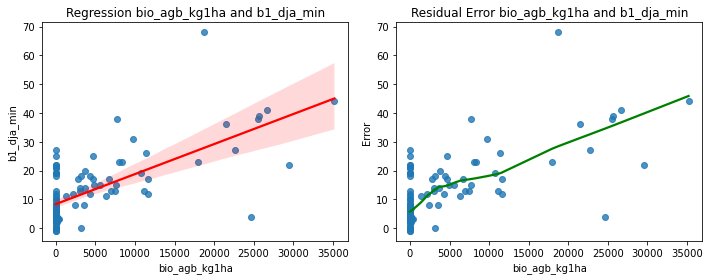

b1_dja_max
slope:  0.0013575859839584906
intersept:  14.25914727003371
r2:  0.7197807487866167
P_value:  5.087552303516801e-18
std error:  0.0001290131657178442


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


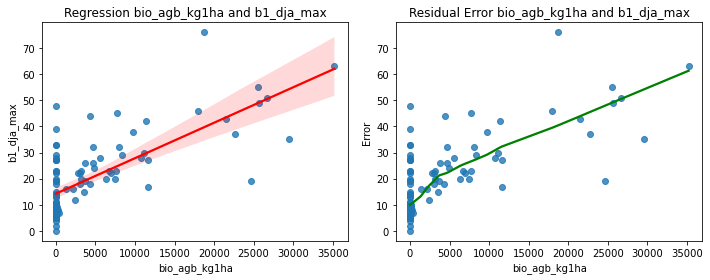

b1_dja_mean
slope:  0.0011949386754183027
intersept:  11.492386270906872
r2:  0.7101461141791634
P_value:  2.2007922465675587e-17
std error:  0.00011673080024762724


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


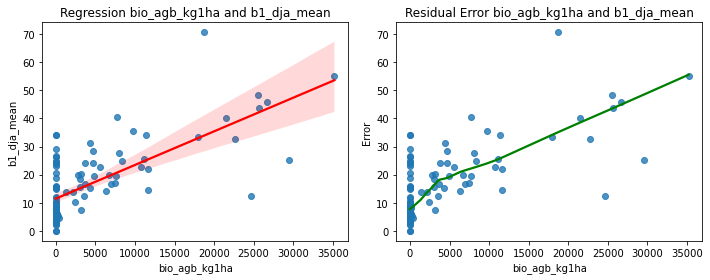

b1_dja_med
slope:  0.0011869248432510454
intersept:  11.624798980925574
r2:  0.7041810816204345
P_value:  5.2913922518205125e-17
std error:  0.00011792098461213839


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


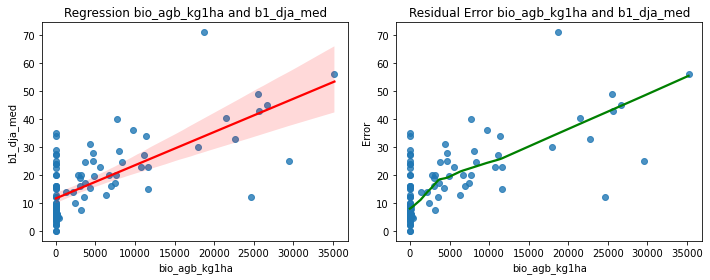

b1_dja_std
slope:  7.319737781350873e-05
intersept:  1.6481376338768188
r2:  0.38750667559583984
P_value:  4.426929352672405e-05
std error:  1.7157971534721188e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


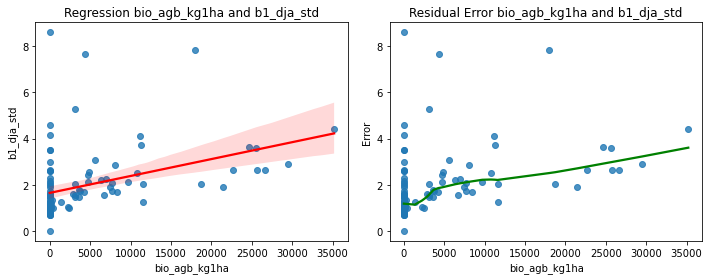

b1_dja_p25
slope:  0.001140291243549193
intersept:  10.46601991198444
r2:  0.7045318625956197
P_value:  5.028372369315209e-17
std error:  0.00011317602258200575


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


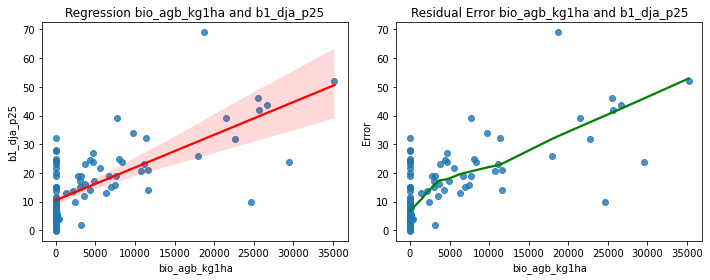

b1_dja_p50
slope:  0.0011869248432510454
intersept:  11.624798980925574
r2:  0.7041810816204345
P_value:  5.2913922518205125e-17
std error:  0.00011792098461213839


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


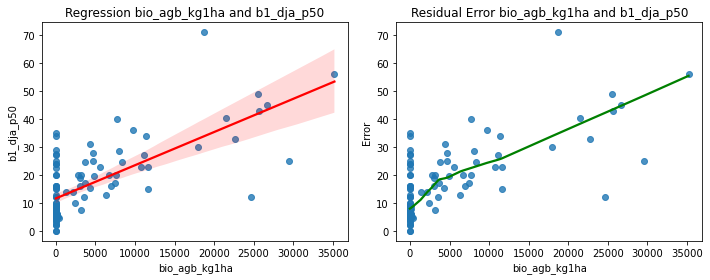

b1_dja_p75
slope:  0.001253949420055138
intersept:  12.548923817780583
r2:  0.7077977947168391
P_value:  3.11678202567654e-17
std error:  0.00012331393890411033


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


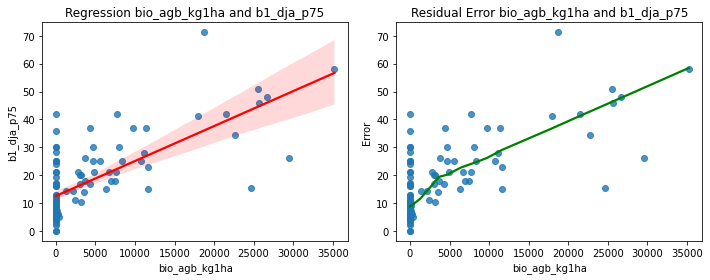

b1_dja_p95
slope:  0.001293888971487281
intersept:  13.755017395679806
r2:  0.7063723456571828
P_value:  3.843415960831606e-17
std error:  0.00012775564248258578


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


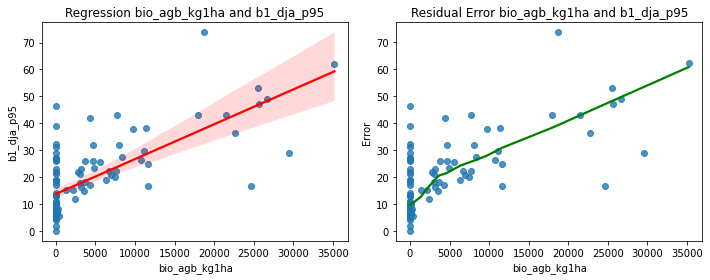

b1_dja_p99
slope:  0.0013452020155238652
intersept:  14.15646473927248
r2:  0.7174877565646377
P_value:  7.249015523355621e-18
std error:  0.0001286826110154904


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


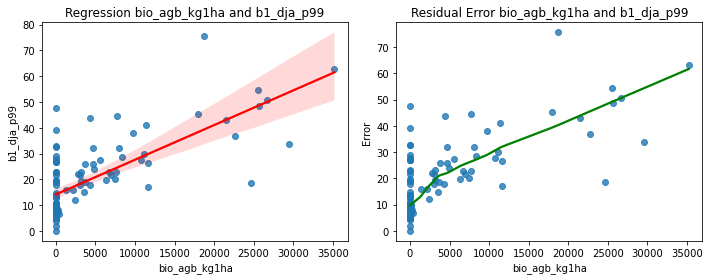

b1_dbi_min
slope:  -0.014329304102408773
intersept:  551.0507771703128
r2:  -0.4919537045126635
P_value:  9.836517179202997e-08
std error:  0.0024986853471409224


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


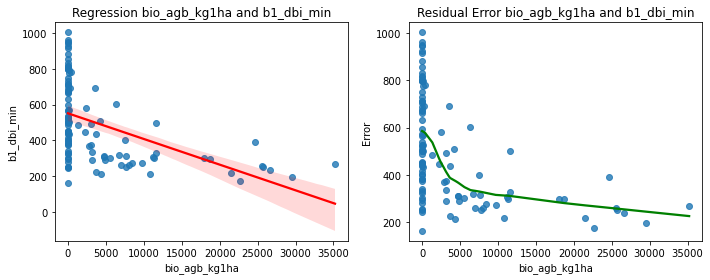

b1_dbi_max
slope:  -0.015359617014304158
intersept:  670.0043668082794
r2:  -0.46902129743114684
P_value:  4.4986023891192604e-07
std error:  0.002849848727333921


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


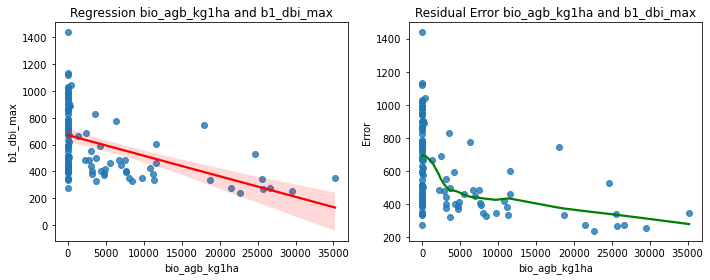

b1_dbi_mean
slope:  -0.015122197910628622
intersept:  609.294946795843
r2:  -0.49470013866153045
P_value:  8.137440042978898e-08
std error:  0.0026176157797248908


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


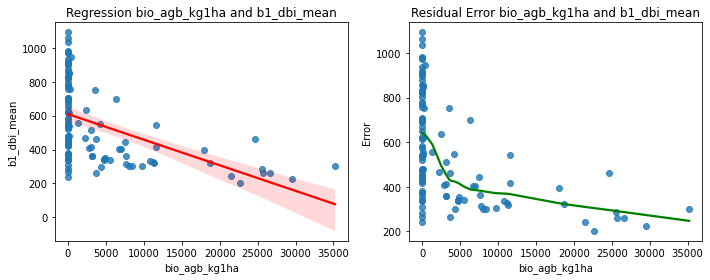

b1_dbi_med
slope:  -0.015100840272979092
intersept:  608.09670799222
r2:  -0.49444464160969215
P_value:  8.282844997630062e-08
std error:  0.0026157070435370595


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


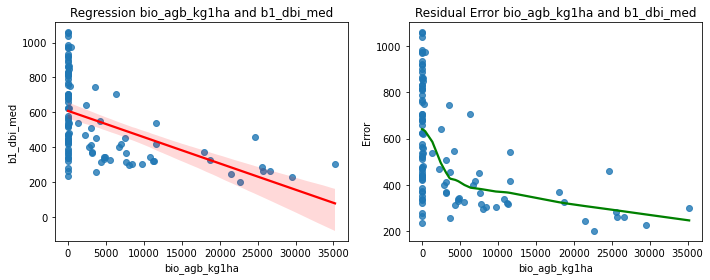

b1_dbi_std
slope:  -0.0003543760173827411
intersept:  32.37028779460971
r2:  -0.1252802527897712
P_value:  0.20287716021775215
std error:  0.0002765208632545494


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


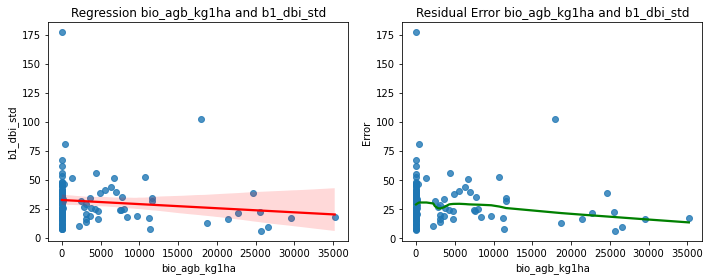

b1_dbi_p25
slope:  -0.014919170384523684
intersept:  588.5377338286117
r2:  -0.49556106189148896
P_value:  7.665199855284776e-08
std error:  0.002576530350945238


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


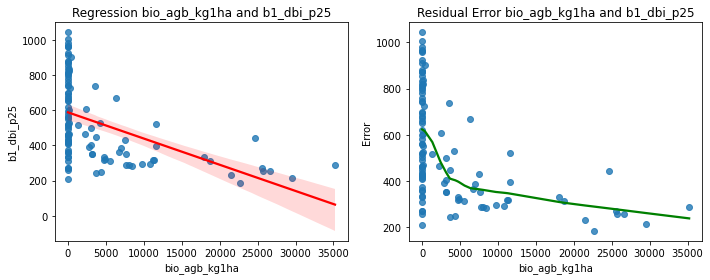

b1_dbi_p50
slope:  -0.015100840272979092
intersept:  608.09670799222
r2:  -0.49444464160969215
P_value:  8.282844997630062e-08
std error:  0.0026157070435370595


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


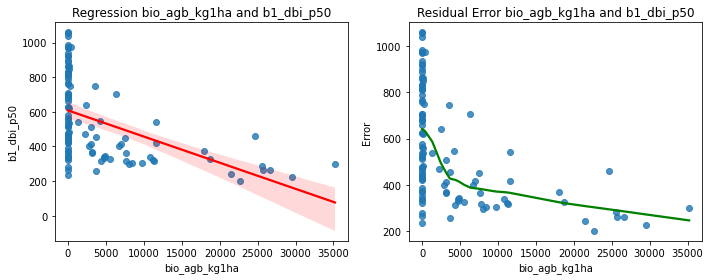

b1_dbi_p75
slope:  -0.01548592297692701
intersept:  630.131113720179
r2:  -0.49700894297658654
P_value:  6.929405135359026e-08
std error:  0.0026640759892434993


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


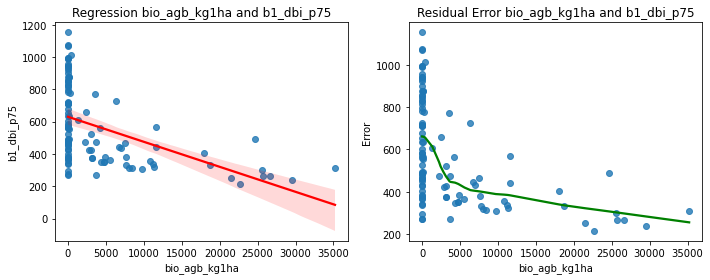

b1_dbi_p95
slope:  -0.015591547911387348
intersept:  658.9720022375017
r2:  -0.4803714730558397
P_value:  2.1494066291872932e-07
std error:  0.00280495087027761


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


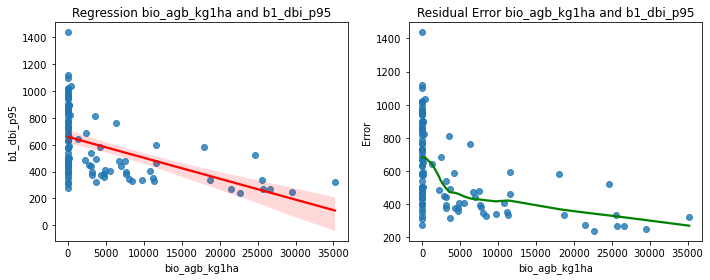

b1_dbi_p99
slope:  -0.015409225719116139
intersept:  667.7804152378078
r2:  -0.4715634147622871
P_value:  3.821540761897317e-07
std error:  0.0028392787391515093


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


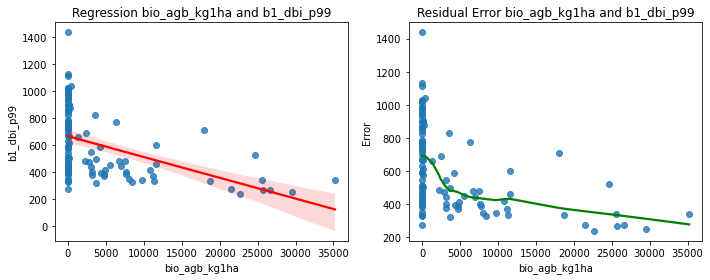

b2_dbi_min
slope:  -0.02162908580846797
intersept:  844.9943066023817
r2:  -0.5259007415836385
P_value:  8.360030053844354e-09
std error:  0.003446779871368403


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


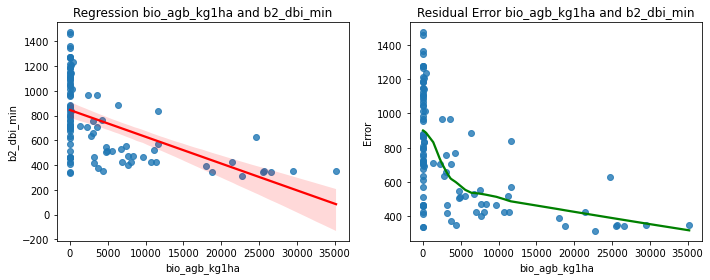

b2_dbi_max
slope:  -0.023094887531605133
intersept:  1012.7939465711753
r2:  -0.4997028657009886
P_value:  5.735997288895029e-08
std error:  0.0039445913455579


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


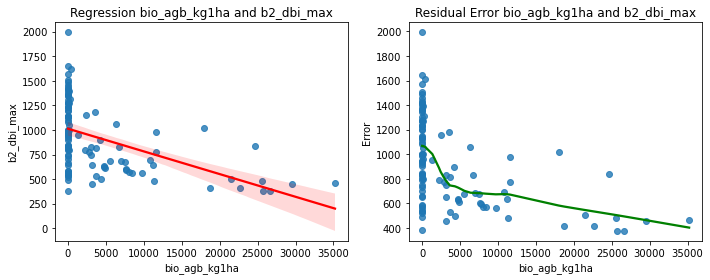

b2_dbi_mean
slope:  -0.02275229653346796
intersept:  926.5498283850119
r2:  -0.5269822358140995
P_value:  7.693752191080655e-09
std error:  0.0036154833767762886


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


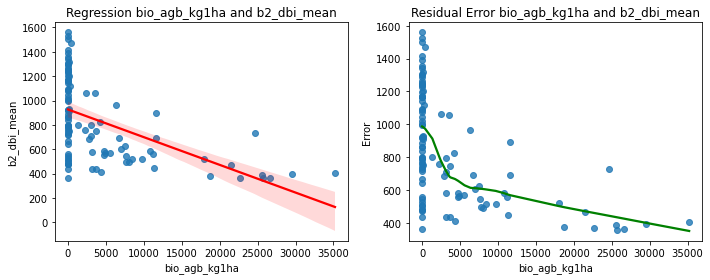

b2_dbi_med
slope:  -0.0227702534519862
intersept:  924.4938298736492
r2:  -0.5279608319585867
P_value:  7.134955489312367e-09
std error:  0.0036090481541742104


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


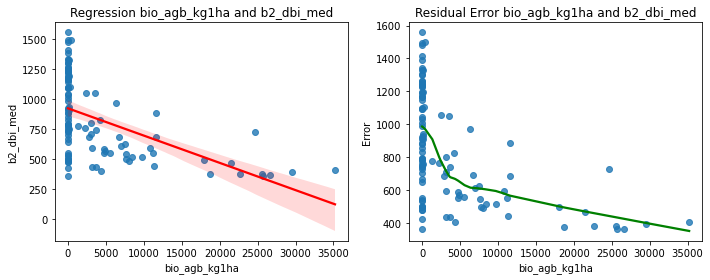

b2_dbi_std
slope:  -0.000500972824259077
intersept:  45.805586305108996
r2:  -0.12934270962122843
P_value:  0.18849831850319348
std error:  0.0003784339557339251


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


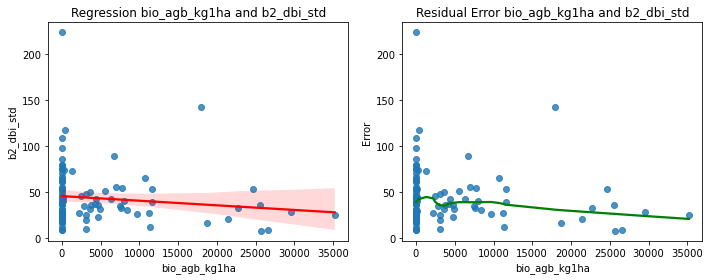

b2_dbi_p25
slope:  -0.0224653815194092
intersept:  896.4233758341989
r2:  -0.5279925650791616
P_value:  7.117502653042574e-09
std error:  0.003560429734268277


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


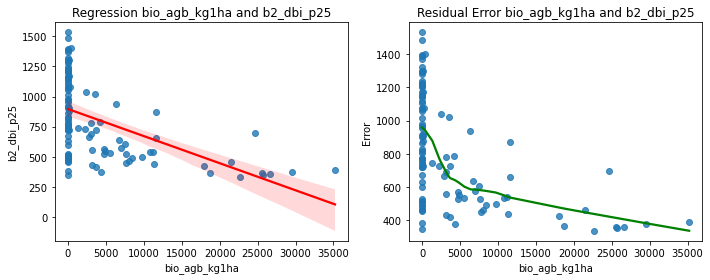

b2_dbi_p50
slope:  -0.0227702534519862
intersept:  924.4938298736492
r2:  -0.5279608319585867
P_value:  7.134955489312367e-09
std error:  0.0036090481541742104


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


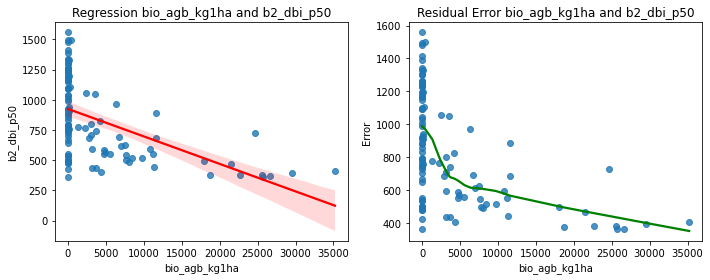

b2_dbi_p75
slope:  -0.023196999805926606
intersept:  956.0154901872891
r2:  -0.5276322314368318
P_value:  7.318108885489354e-09
std error:  0.0036798610802581664


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


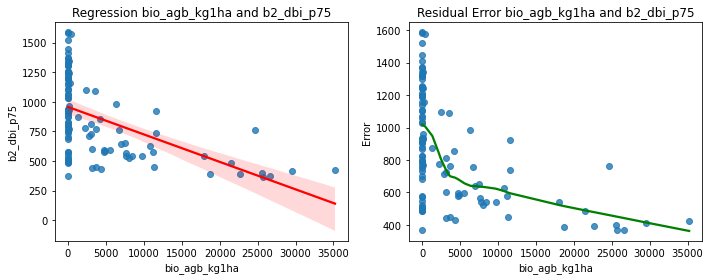

b2_dbi_p95
slope:  -0.023443803762915588
intersept:  997.889633824983
r2:  -0.513902960469012
P_value:  2.0606798132120493e-08
std error:  0.0038560162258847977


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


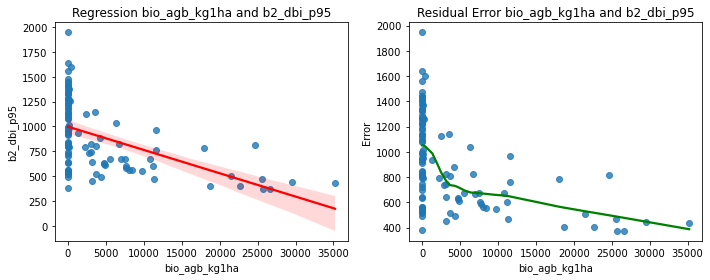

b2_dbi_p99
slope:  -0.02316608175851677
intersept:  1009.8021798788102
r2:  -0.5027224418910272
P_value:  4.6318469885419434e-08
std error:  0.003925043874887915


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


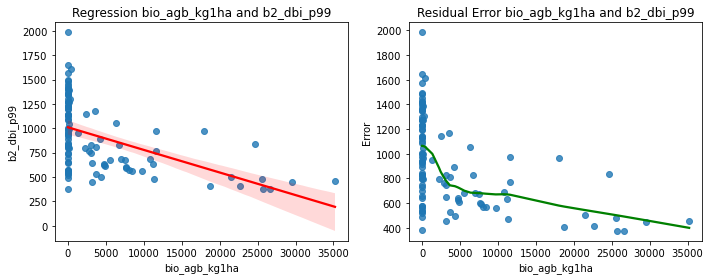

b3_dbi_min
slope:  -0.03702415875453632
intersept:  1243.1363467982771
r2:  -0.5857377349779087
P_value:  5.257355444435532e-11
std error:  0.005047969844193301


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


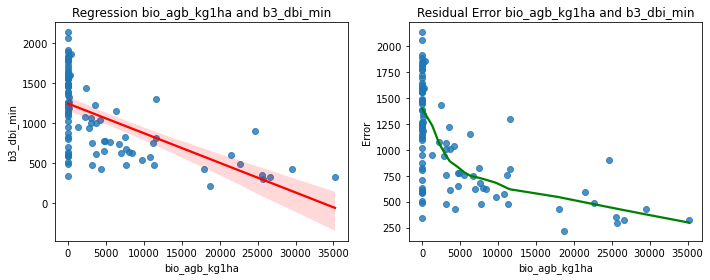

b3_dbi_max
slope:  -0.037887206576803924
intersept:  1482.9669550416243
r2:  -0.5564649904526824
P_value:  7.115551842091415e-10
std error:  0.0055740358609666025


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


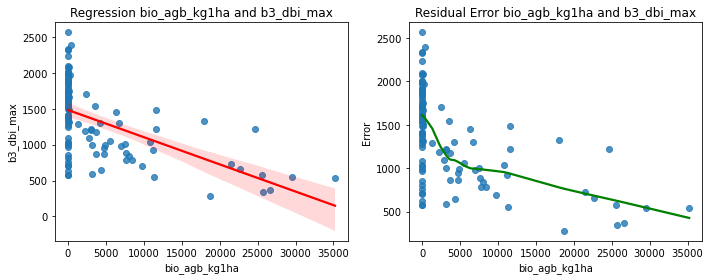

b3_dbi_mean
slope:  -0.03815866910348022
intersept:  1361.5359462407569
r2:  -0.5834438676761159
P_value:  6.50896092365449e-11
std error:  0.005233757900711539


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


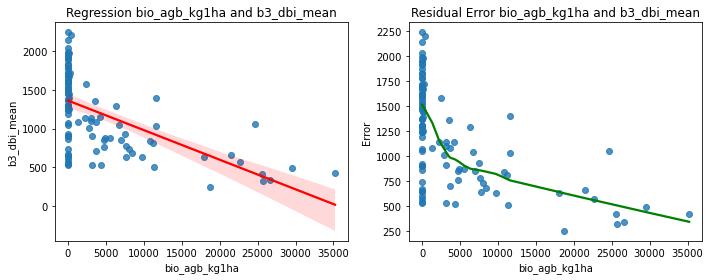

b3_dbi_med
slope:  -0.03837072012856088
intersept:  1360.0552397942422
r2:  -0.584053361053218
P_value:  6.150911303767403e-11
std error:  0.005254513636181743


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


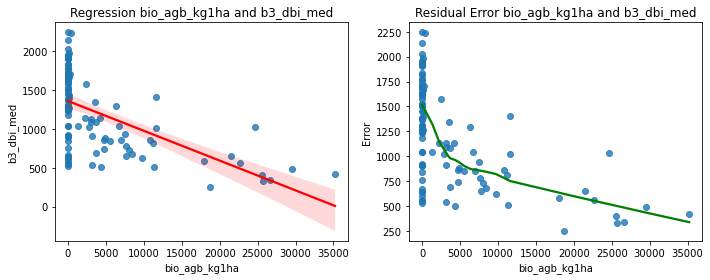

b3_dbi_std
slope:  -0.00042355618164184334
intersept:  65.57040829175308
r2:  -0.08057941888023025
P_value:  0.41384881356646464
std error:  0.0005162424788343453


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


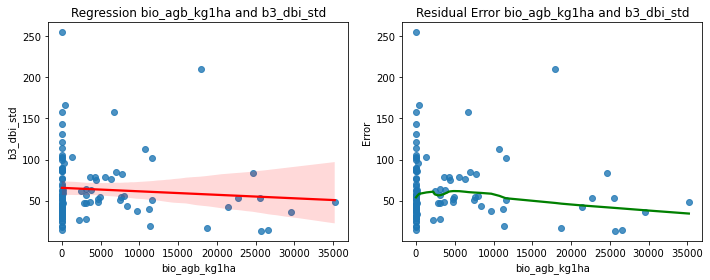

b3_dbi_p25
slope:  -0.03788918914277735
intersept:  1317.670423865542
r2:  -0.5844461880493972
P_value:  5.930282155821626e-11
std error:  0.005183278576064504


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


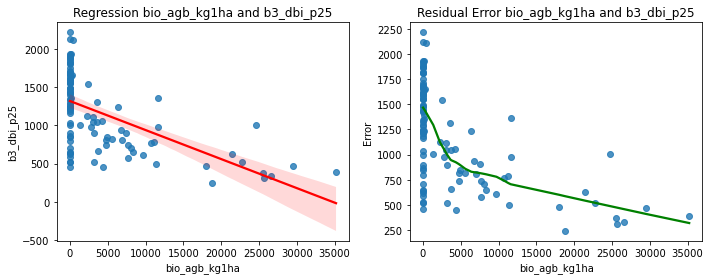

b3_dbi_p50
slope:  -0.03837072012856088
intersept:  1360.0552397942422
r2:  -0.584053361053218
P_value:  6.150911303767403e-11
std error:  0.005254513636181743


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


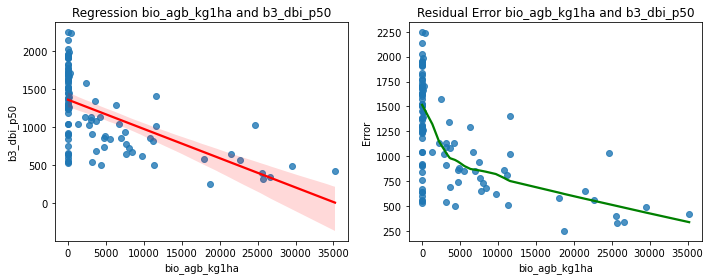

b3_dbi_p75
slope:  -0.03858915518256677
intersept:  1405.566846509081
r2:  -0.5828448534022515
P_value:  6.880371716836489e-11
std error:  0.005301047183041986


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


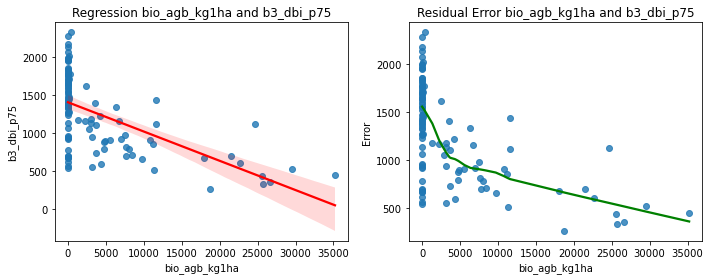

b3_dbi_p95
slope:  -0.03866366007068709
intersept:  1460.7209194418954
r2:  -0.5716864629573334
P_value:  1.8955800814339838e-10
std error:  0.005467518982308829


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


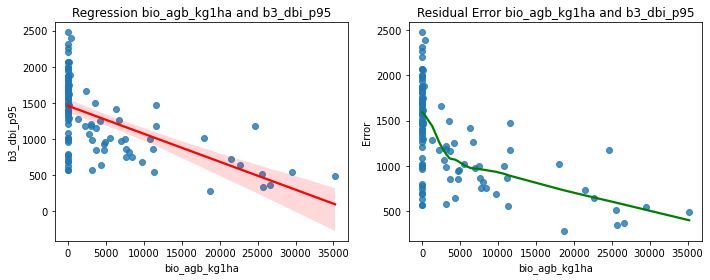

b3_dbi_p99
slope:  -0.03804928223080341
intersept:  1478.4495350738102
r2:  -0.5597952433499366
P_value:  5.357930176722384e-10
std error:  0.005549576131885125


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


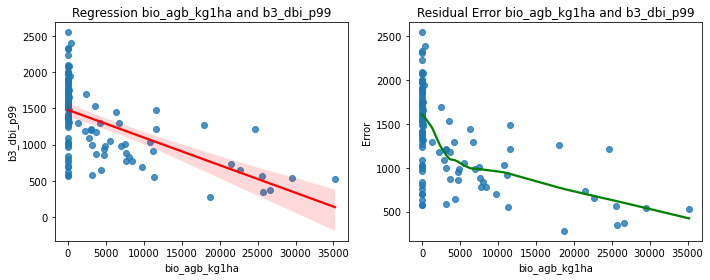

b4_dbi_min
slope:  -0.020816990714746946
intersept:  2266.6133265749845
r2:  -0.35828477449838164
P_value:  0.00017489735796082353
std error:  0.005344875226083048


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


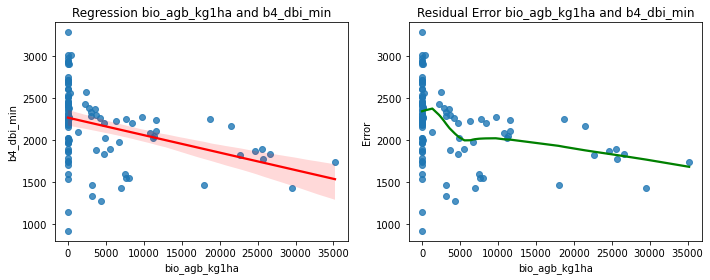

b4_dbi_max
slope:  -0.01547839628222276
intersept:  2579.278437673108
r2:  -0.2766887537492789
P_value:  0.004272860917010376
std error:  0.00529689015786741


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


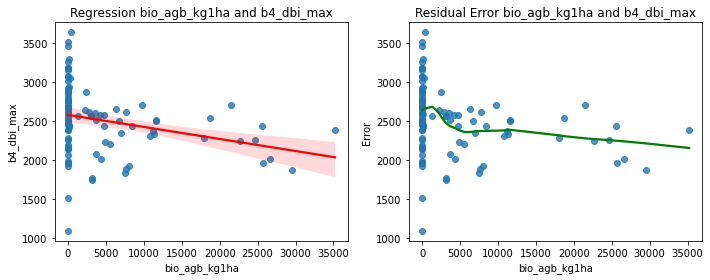

b4_dbi_mean
slope:  -0.018661156297519348
intersept:  2420.166121826242
r2:  -0.3307337255387806
P_value:  0.0005690502843595114
std error:  0.005246703318129729


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


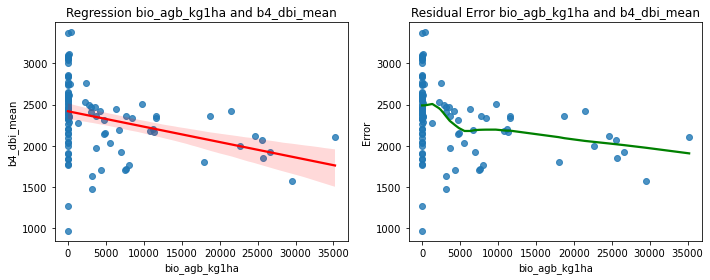

b4_dbi_med
slope:  -0.018709576811820148
intersept:  2417.545237419311
r2:  -0.3277987745419408
P_value:  0.0006412089142826329
std error:  0.0053131711777374005


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


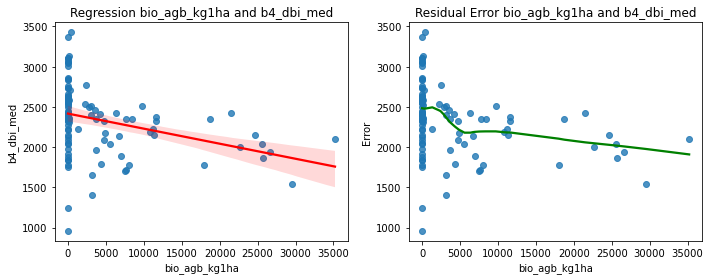

b4_dbi_std
slope:  0.0012982437410785622
intersept:  86.29099326044616
r2:  0.2102656690356366
P_value:  0.03132494639674564
std error:  0.0005947714612810569


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


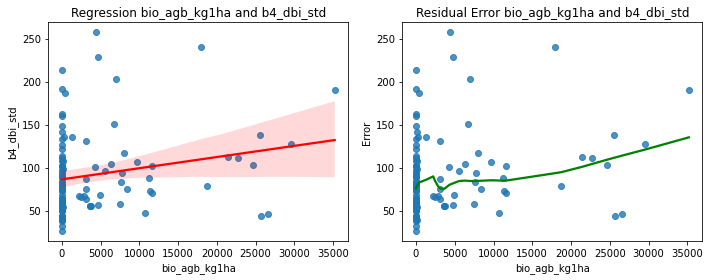

b4_dbi_p25
slope:  -0.019513073105259928
intersept:  2361.1262333531336
r2:  -0.3383124793541663
P_value:  0.00041578603914875316
std error:  0.005348035447370711


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


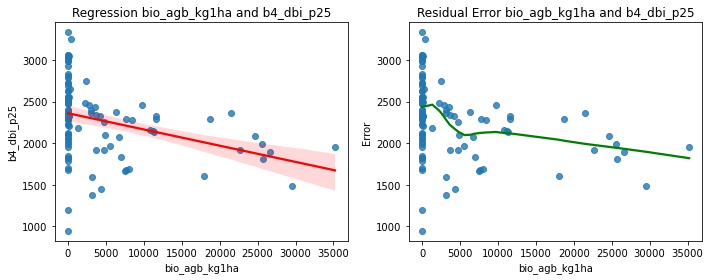

b4_dbi_p50
slope:  -0.018709576811820148
intersept:  2417.545237419311
r2:  -0.3277987745419408
P_value:  0.0006412089142826329
std error:  0.0053131711777374005


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


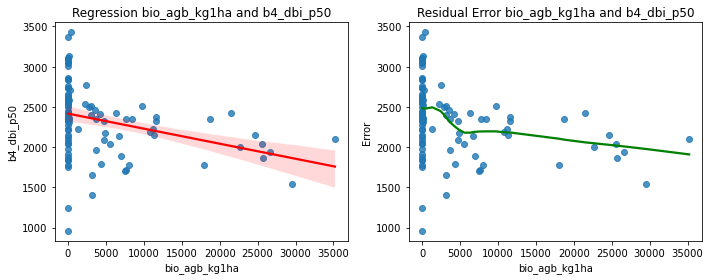

b4_dbi_p75
slope:  -0.017914048009820133
intersept:  2479.735414190451
r2:  -0.3210695623585498
P_value:  0.0008393636405026713
std error:  0.0052065670818951795


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


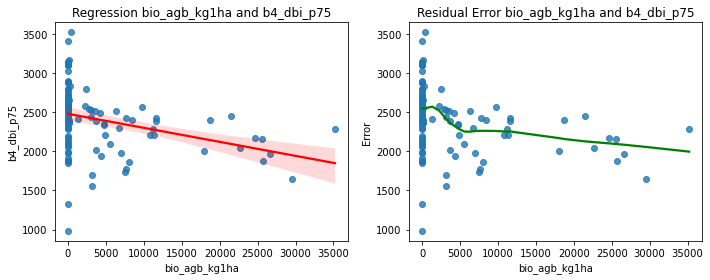

b4_dbi_p95
slope:  -0.01618620526237438
intersept:  2549.5136111792435
r2:  -0.29174308502656854
P_value:  0.0025304954111674623
std error:  0.005228888058870529


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


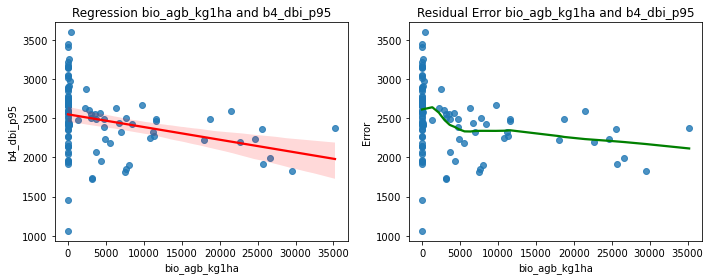

b4_dbi_p99
slope:  -0.015598224406247967
intersept:  2573.2451486344476
r2:  -0.2794204330064541
P_value:  0.0038934960213406595
std error:  0.005281362811650573


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


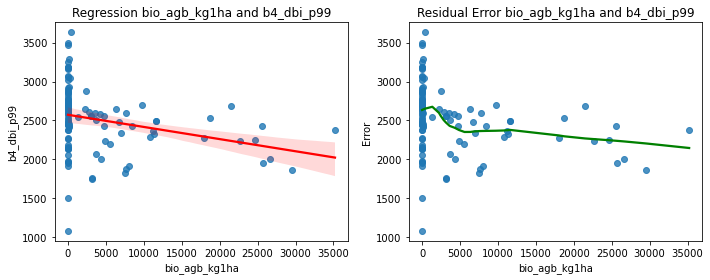

b5_dbi_min
slope:  -0.054462086201363696
intersept:  2708.83559719582
r2:  -0.6164315912491264
P_value:  2.550827831221243e-12
std error:  0.006854737898321726


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


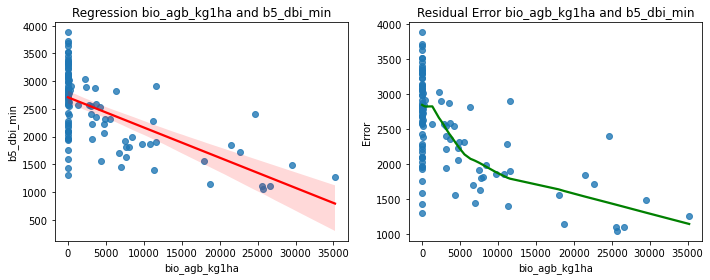

b5_dbi_max
slope:  -0.05129563367523687
intersept:  3112.6137096943025
r2:  -0.5872712186944183
P_value:  4.553669332262749e-11
std error:  0.006965960666862324


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


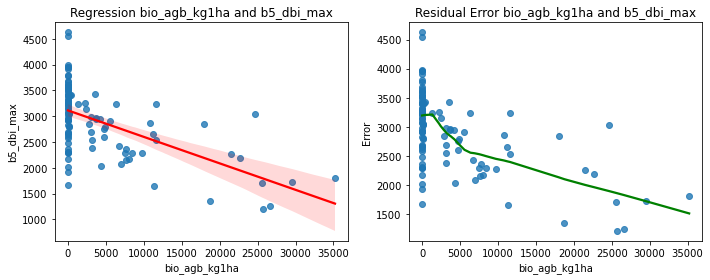

b5_dbi_mean
slope:  -0.05435822488504417
intersept:  2917.152816147825
r2:  -0.6220858121823416
P_value:  1.4087786651550438e-12
std error:  0.00674108600896636


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


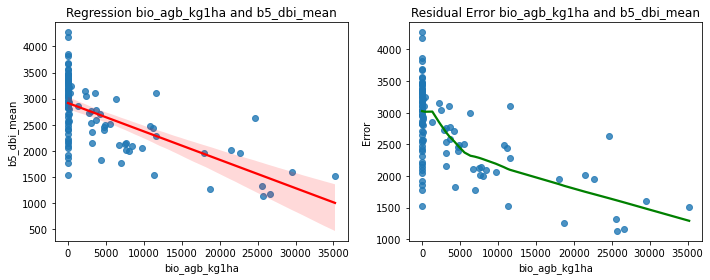

b5_dbi_med
slope:  -0.054622265471920214
intersept:  2918.2243995288063
r2:  -0.6261196339189683
P_value:  9.155828543544702e-13
std error:  0.006702492706323966


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


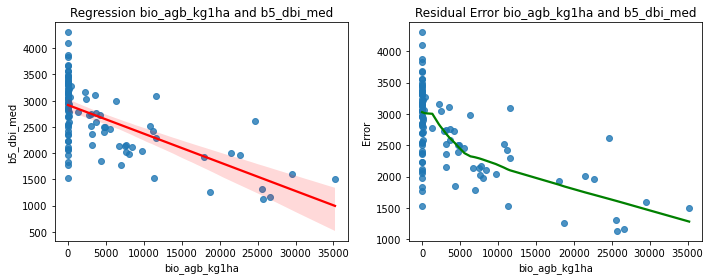

b5_dbi_std
slope:  0.0005946403719215455
intersept:  111.34380532840234
r2:  0.07614204331093913
P_value:  0.44011100621260135
std error:  0.0007672707692313235


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


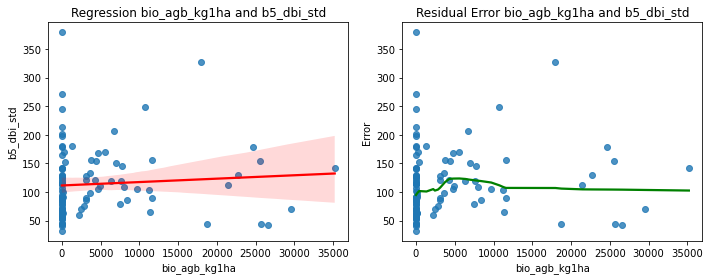

b5_dbi_p25
slope:  -0.0549592264365943
intersept:  2842.854263377535
r2:  -0.625233268959912
P_value:  1.0070507947418201e-12
std error:  0.0067595578185564486


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


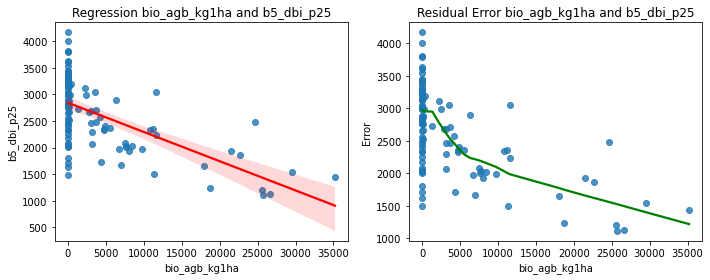

b5_dbi_p50
slope:  -0.054622265471920214
intersept:  2918.2243995288063
r2:  -0.6261196339189683
P_value:  9.155828543544702e-13
std error:  0.006702492706323966


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


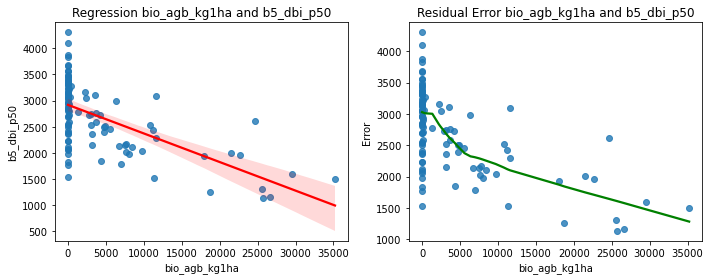

b5_dbi_p75
slope:  -0.054434810104888647
intersept:  2995.9699780700143
r2:  -0.6218565832957553
P_value:  1.4434339101452293e-12
std error:  0.006754642363739908


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


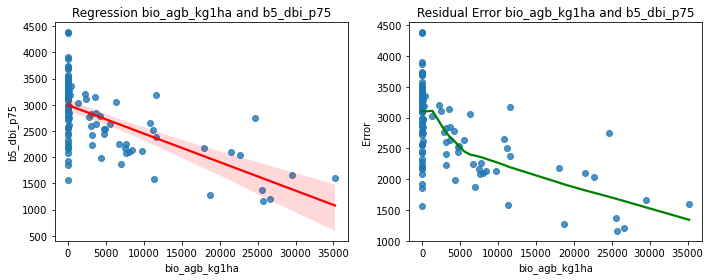

b5_dbi_p95
slope:  -0.052597064164531145
intersept:  3078.2714298845985
r2:  -0.5987868238821036
P_value:  1.510487583686792e-11
std error:  0.006931919805473419


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


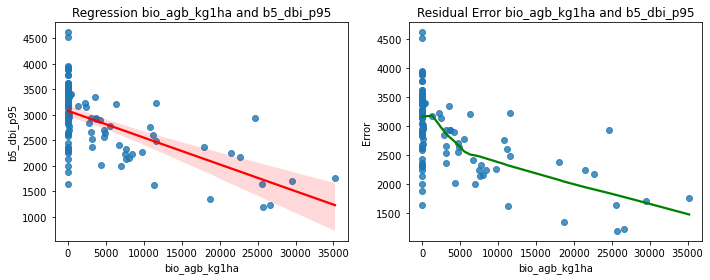

b5_dbi_p99
slope:  -0.05153739010228297
intersept:  3105.636707765272
r2:  -0.5897261316881267
P_value:  3.612232828343022e-11
std error:  0.006954269574045335


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


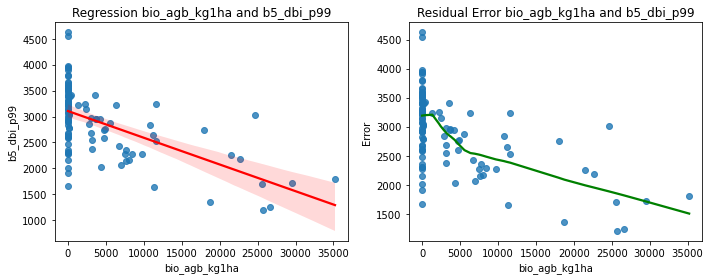

b6_dbi_min
slope:  -0.04574708940186908
intersept:  1765.578631370067
r2:  -0.6341499901823662
P_value:  3.810376461863314e-13
std error:  0.005496045997945076


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


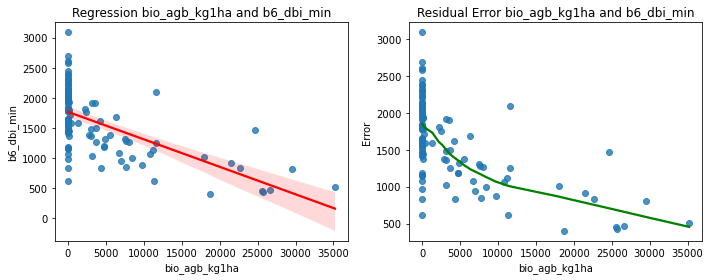

b6_dbi_max
slope:  -0.04440808522070548
intersept:  2110.9434934168544
r2:  -0.578404741283208
P_value:  1.0345103110166808e-10
std error:  0.006171186032649822


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


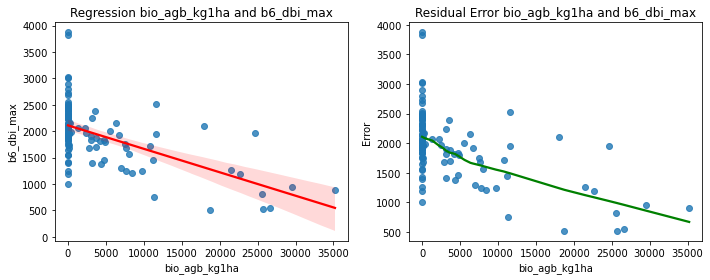

b6_dbi_mean
slope:  -0.046448823826088975
intersept:  1942.68487174663
r2:  -0.6268925377445027
P_value:  8.424228173335171e-13
std error:  0.005687997670526528


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


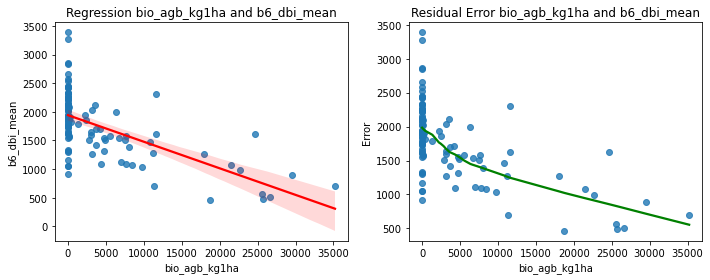

b6_dbi_med
slope:  -0.04707291515903587
intersept:  1945.411439343567
r2:  -0.6335552057919824
P_value:  4.06956203891256e-13
std error:  0.005664208148529008


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


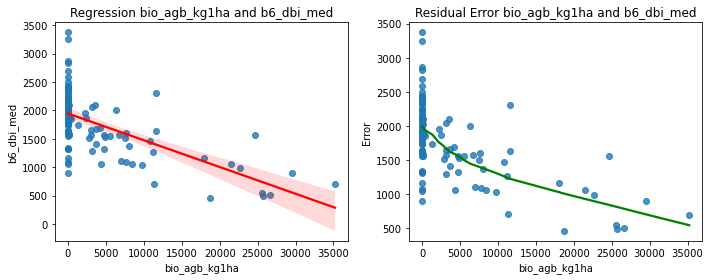

b6_dbi_std
slope:  0.00014672740055028687
intersept:  93.45161185429556
r2:  0.020929309661863908
P_value:  0.8321713198314822
std error:  0.0006906254341568056


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


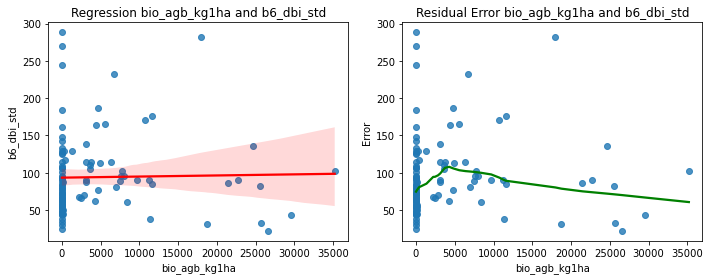

b6_dbi_p25
slope:  -0.04668474604542932
intersept:  1881.630886887495
r2:  -0.6332249368852524
P_value:  4.2207606407372026e-13
std error:  0.005622394051944073


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


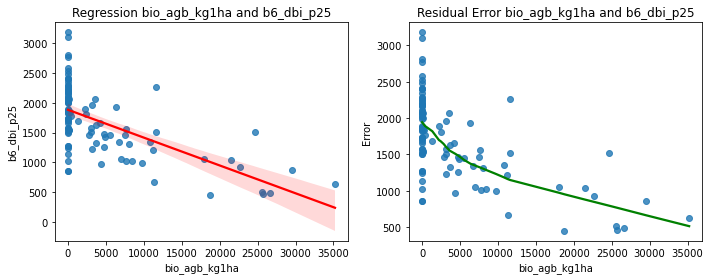

b6_dbi_p50
slope:  -0.04707291515903587
intersept:  1945.411439343567
r2:  -0.6335552057919824
P_value:  4.06956203891256e-13
std error:  0.005664208148529008


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


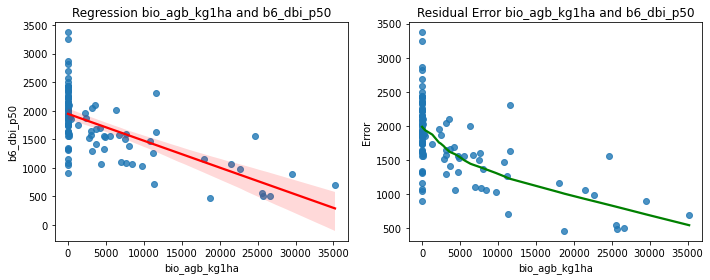

b6_dbi_p75
slope:  -0.046586222515767925
intersept:  2003.7242421367878
r2:  -0.6242380260829358
P_value:  1.1202855833830215e-12
std error:  0.005744733877338499


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


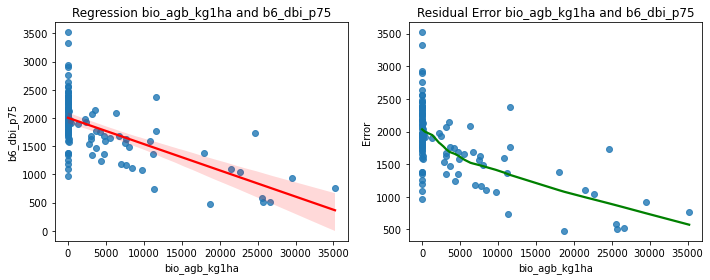

b6_dbi_p95
slope:  -0.04588274577190797
intersept:  2079.139435093715
r2:  -0.5975180615834946
P_value:  1.709440104960437e-11
std error:  0.006067025721821028


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


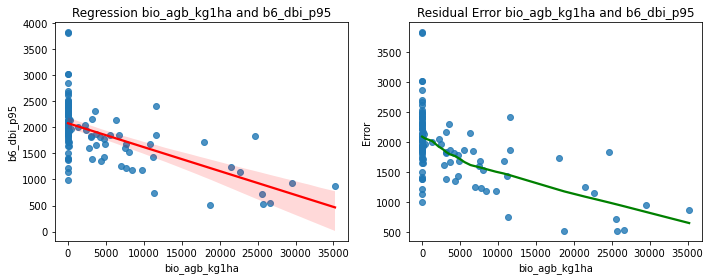

b6_dbi_p99
slope:  -0.044719417041764804
intersept:  2104.4682898383808
r2:  -0.5828488936382619
P_value:  6.877799551989472e-11
std error:  0.006143105489358864


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


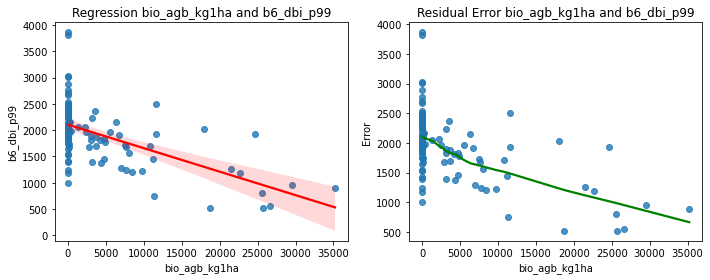

b1_dim_min
slope:  -0.000667525114060545
intersept:  18.56174240521724
r2:  -0.3335898946190457
P_value:  0.0005060557238683684
std error:  0.00018587374367456285


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


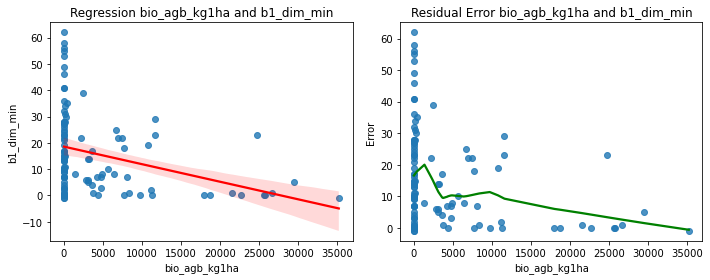

b1_dim_max
slope:  -0.0008273479519743149
intersept:  29.739541179498914
r2:  -0.34755154057672183
P_value:  0.00028053708471991996
std error:  0.000219935919536688


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


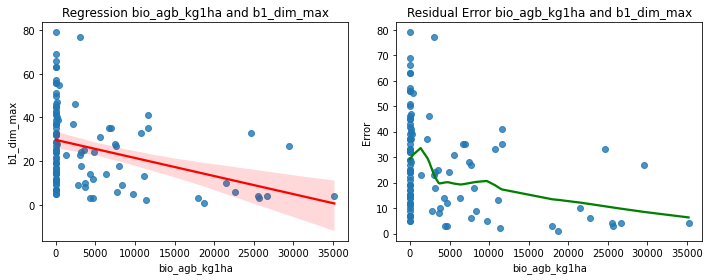

b1_dim_mean
slope:  -0.0007648771550252794
intersept:  24.065741310658908
r2:  -0.35685881104327344
P_value:  0.00018640892938721418
std error:  0.00019728639858616128


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


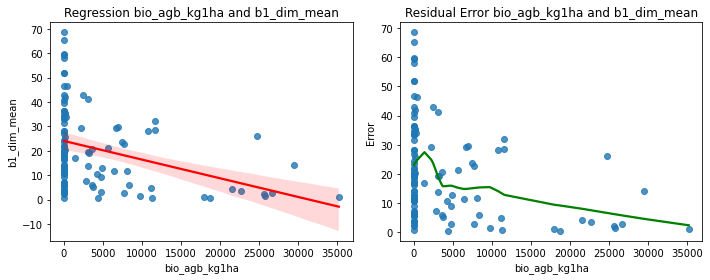

b1_dim_med
slope:  -0.0007756881850198038
intersept:  24.053644322447987
r2:  -0.35810588084528455
P_value:  0.00017630450117737262
std error:  0.0001992762877842917


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


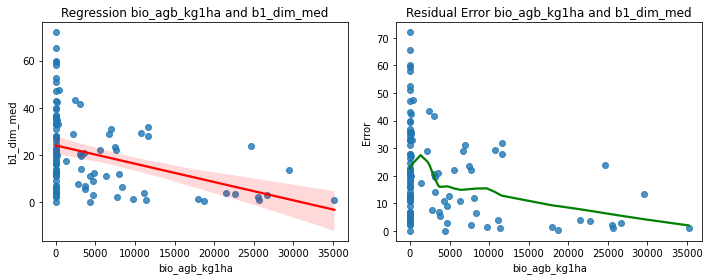

b1_dim_std
slope:  -3.720800916193779e-05
intersept:  2.9658819002357224
r2:  -0.1302364700793216
P_value:  0.18543684979941716
std error:  2.7910682700877735e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


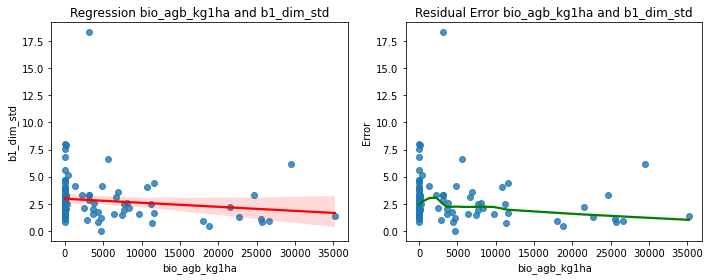

b1_dim_p25
slope:  -0.0007449089369352588
intersept:  22.18062453250635
r2:  -0.35640276237394886
P_value:  0.00019023611713734132
std error:  0.00019241766021469564


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


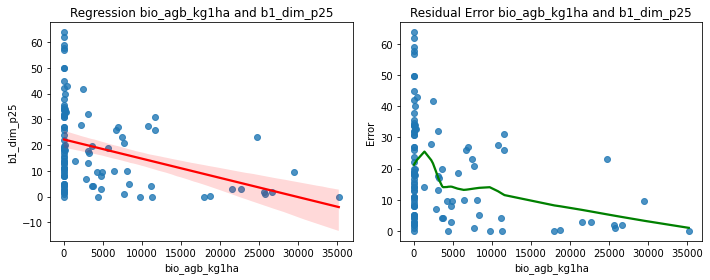

b1_dim_p50
slope:  -0.0007756881850198038
intersept:  24.053644322447987
r2:  -0.35810588084528455
P_value:  0.00017630450117737262
std error:  0.0001992762877842917


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


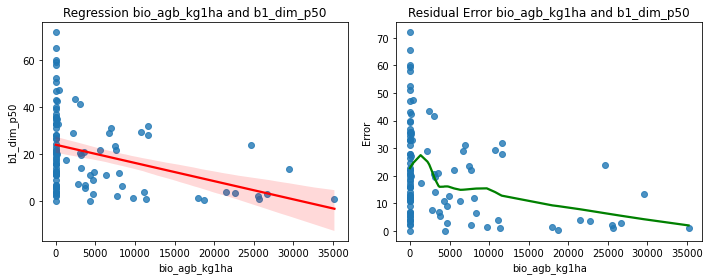

b1_dim_p75
slope:  -0.0007925889238268121
intersept:  25.933332453093918
r2:  -0.3559795767995126
P_value:  0.000193852475342043
std error:  0.00020501266838630742


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


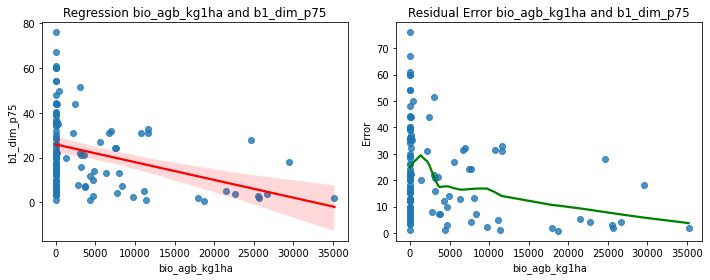

b1_dim_p95
slope:  -0.0008161979412412934
intersept:  28.44515607546821
r2:  -0.35142933461919224
P_value:  0.00023696827343539336
std error:  0.0002142467260584602


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


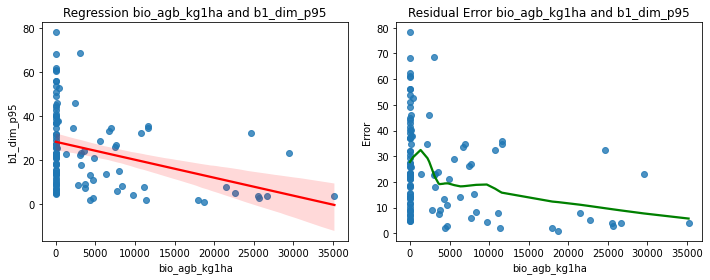

b1_dim_p99
slope:  -0.000824990101382612
intersept:  29.47146672236809
r2:  -0.34847401938699984
P_value:  0.0002695494421808515
std error:  0.0002186486910268839


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


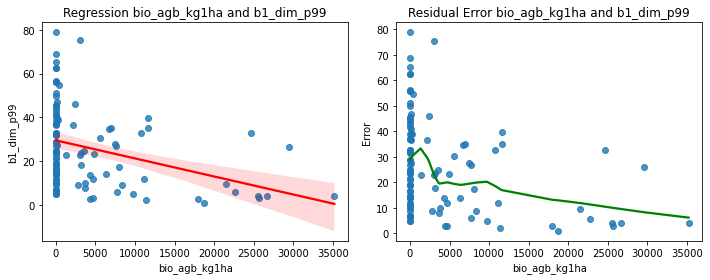

b2_dim_min
slope:  0.0012385883347630897
intersept:  16.46745808974626
r2:  0.545799726871344
P_value:  1.7290307672671908e-09
std error:  0.00018735934856060692


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


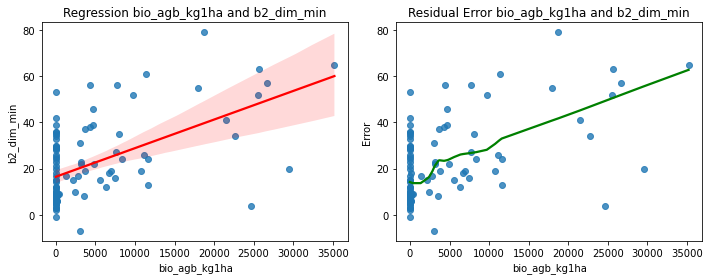

b2_dim_max
slope:  0.0013800809595842156
intersept:  24.82290103268425
r2:  0.5483036910733242
P_value:  1.4076225483657899e-09
std error:  0.000207403522322878


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


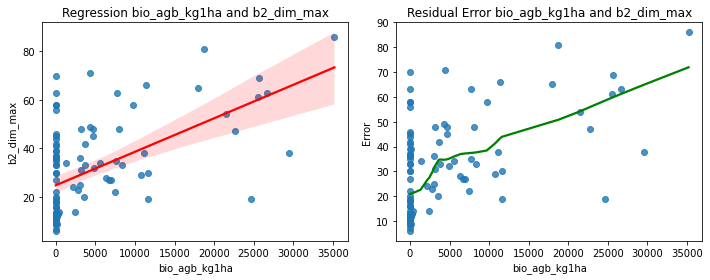

b2_dim_mean
slope:  0.001318592704695873
intersept:  20.545307972792497
r2:  0.5554290002300252
P_value:  7.767147964824472e-10
std error:  0.00019451771774755568


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


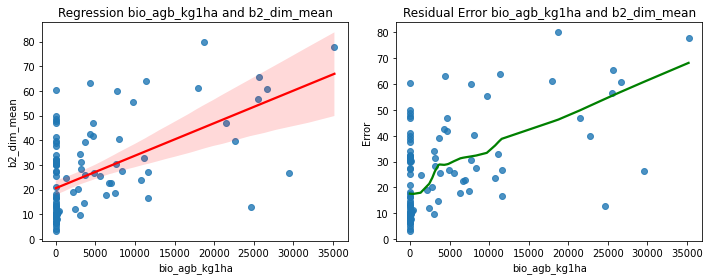

b2_dim_med
slope:  0.0013393544867685162
intersept:  20.482455353379645
r2:  0.5592205394021911
P_value:  5.628037174522057e-10
std error:  0.00019564027226422626


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


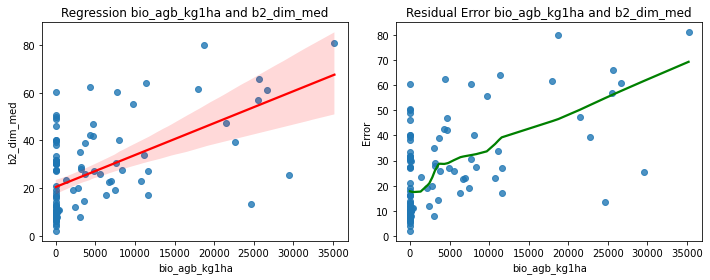

b2_dim_std
slope:  3.7974173261776704e-05
intersept:  2.258407043793132
r2:  0.17918924793901167
P_value:  0.06740000919164445
std error:  2.0543339442710664e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


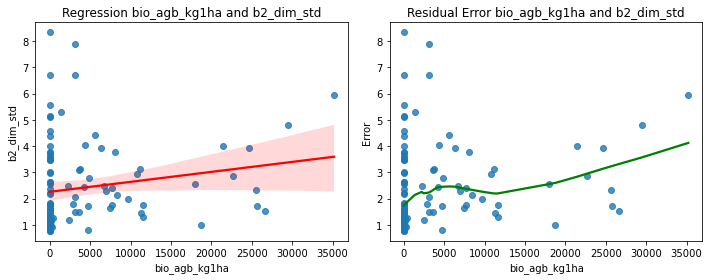

b2_dim_p25
slope:  0.0012888259153701139
intersept:  19.049370277289746
r2:  0.5535008987181878
P_value:  9.13559372968138e-10
std error:  0.0001910835787215298


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


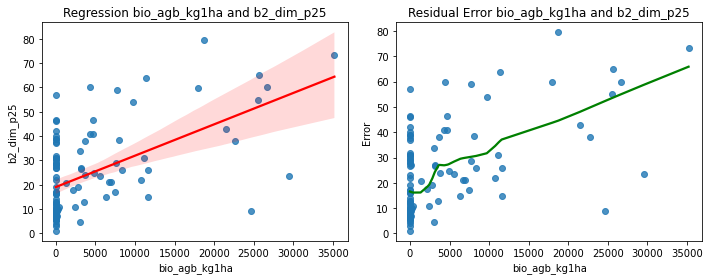

b2_dim_p50
slope:  0.0013393544867685162
intersept:  20.482455353379645
r2:  0.5592205394021911
P_value:  5.628037174522057e-10
std error:  0.00019564027226422626


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


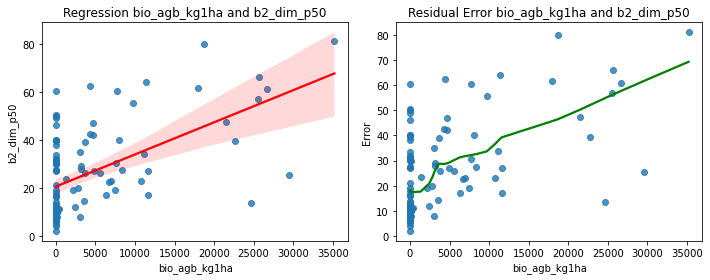

b2_dim_p75
slope:  0.0013474922977932883
intersept:  21.941527938502748
r2:  0.5523085885067923
P_value:  1.0094706297317128e-09
std error:  0.00020040303486152034


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


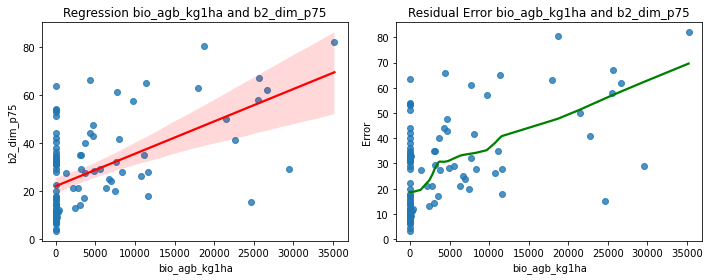

b2_dim_p95
slope:  0.0013612228740466953
intersept:  24.03261995487869
r2:  0.5444735221567351
P_value:  1.9266907561273225e-09
std error:  0.00020662406806604098


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


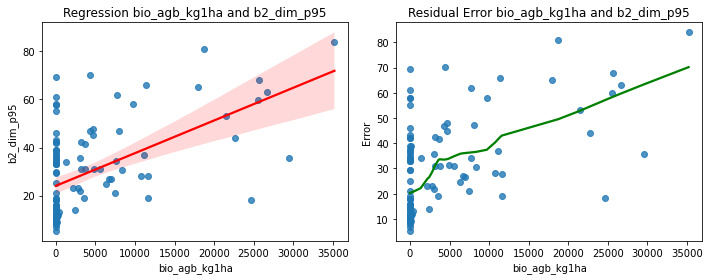

b2_dim_p99
slope:  0.00137595803406014
intersept:  24.66430329280486
r2:  0.5474491500239409
P_value:  1.5102551608340835e-09
std error:  0.00020724529324226838


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


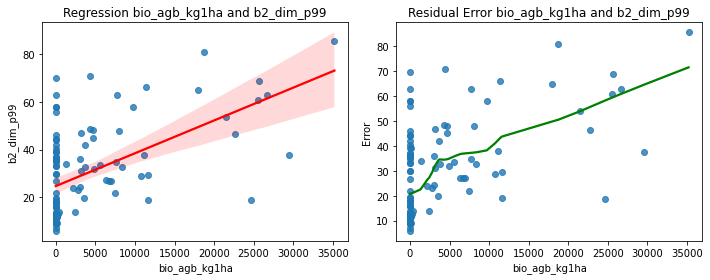

b3_dim_min
slope:  -0.0005159770090454385
intersept:  48.10401091286685
r2:  -0.2697382704758988
P_value:  0.005391123914835947
std error:  0.00018149536782220897


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


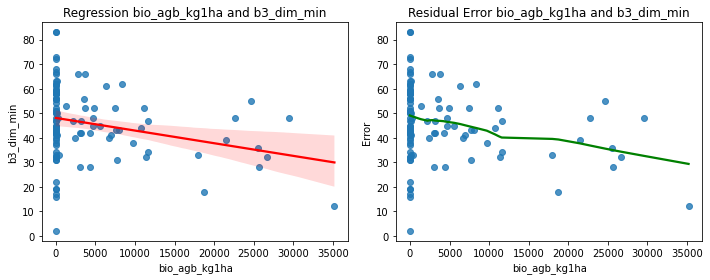

b3_dim_max
slope:  -0.0005582736998439706
intersept:  59.75579836321804
r2:  -0.2963116180998696
P_value:  0.0021464673783204856
std error:  0.0001773065475405253


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


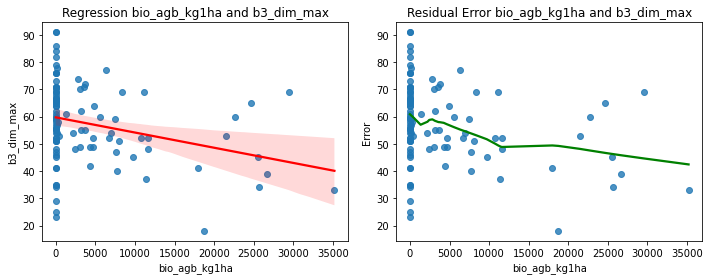

b3_dim_mean
slope:  -0.0005564872623976412
intersept:  54.061980958708034
r2:  -0.29983851194053096
P_value:  0.0018869108334552908
std error:  0.00017445885245382826


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


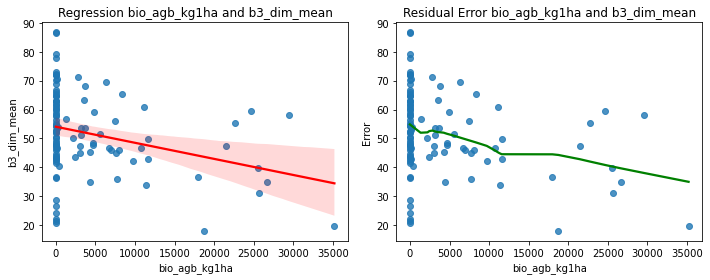

b3_dim_med
slope:  -0.0005678606907016786
intersept:  54.09083736377846
r2:  -0.30081299382629556
P_value:  0.0018203878317885078
std error:  0.00017739064367057393


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


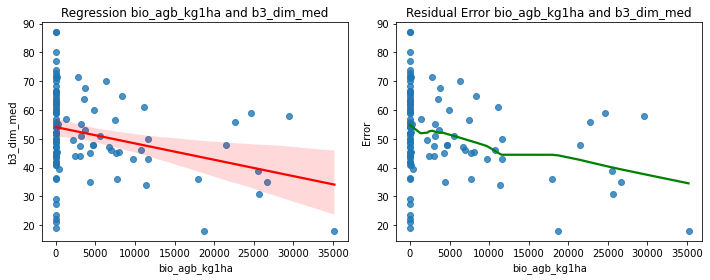

b3_dim_std
slope:  -1.5797605455367074e-06
intersept:  3.1003626366483346
r2:  -0.006637684089400641
P_value:  0.9464204390951937
std error:  2.3450197478612002e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


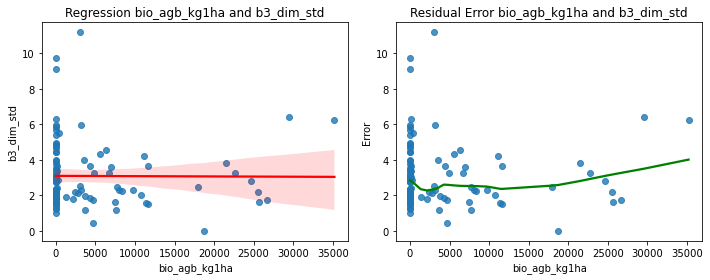

b3_dim_p25
slope:  -0.0005737063345078215
intersept:  52.09843920003722
r2:  -0.3048238450439534
P_value:  0.0015683667657960321
std error:  0.00017662227386949455


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


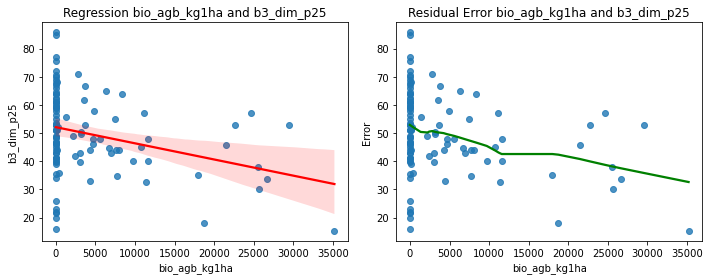

b3_dim_p50
slope:  -0.0005678606907016786
intersept:  54.09083736377846
r2:  -0.30081299382629556
P_value:  0.0018203878317885078
std error:  0.00017739064367057393


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


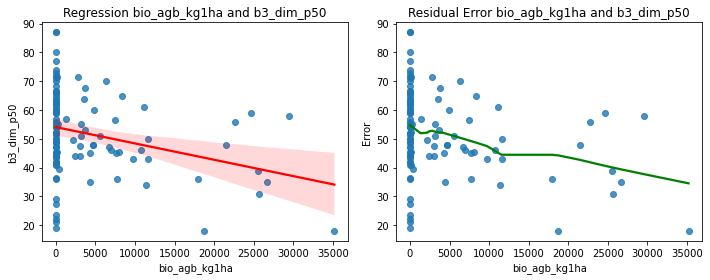

b3_dim_p75
slope:  -0.0005565773399728464
intersept:  56.113041548766084
r2:  -0.3003066329918899
P_value:  0.001854684763792465
std error:  0.00017418820795507415


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


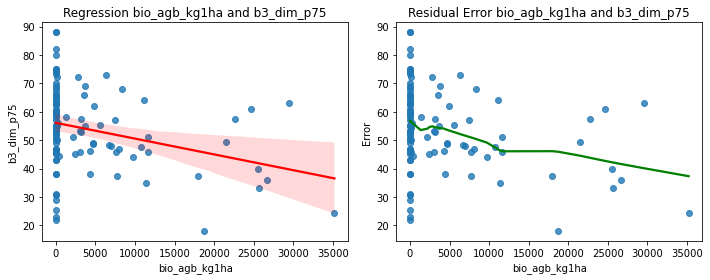

b3_dim_p95
slope:  -0.0005408789867270206
intersept:  58.569297567041424
r2:  -0.2904298046386403
P_value:  0.002651804840599755
std error:  0.0001755921876013439


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


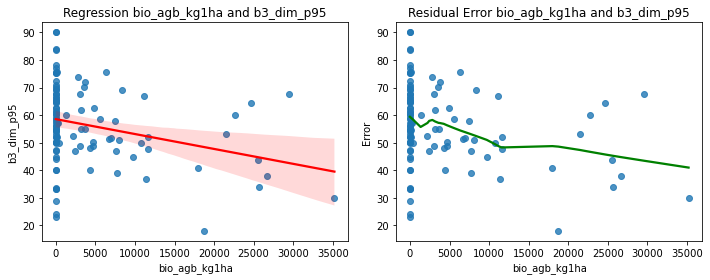

b3_dim_p99
slope:  -0.0005546883678531016
intersept:  59.516723189499885
r2:  -0.29530158161806425
P_value:  0.0022265211803586863
std error:  0.0001768282990905961


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


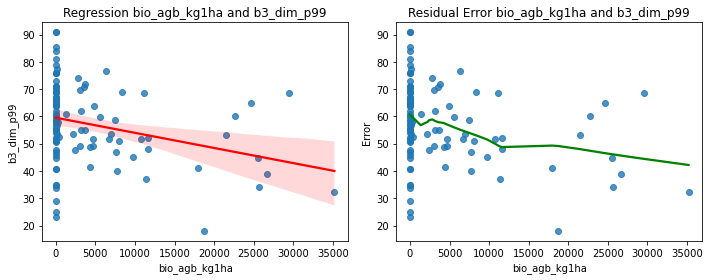

dis_min
slope:  -5.342621021243963e-05
intersept:  4.250373197860304
r2:  -0.15856828592890498
P_value:  0.10617417995801713
std error:  3.2778545697833224e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


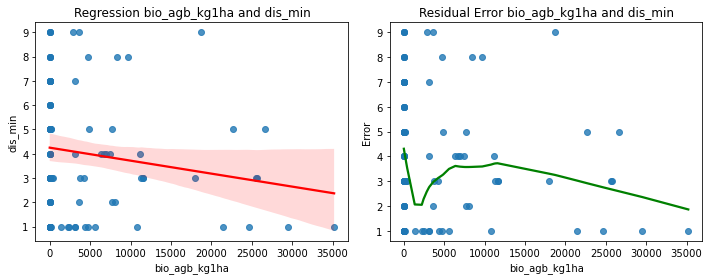

dis_max
slope:  7.834796172168314e-05
intersept:  6.98901996062385
r2:  0.23292699201881503
P_value:  0.016792977045515602
std error:  3.22311871975793e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


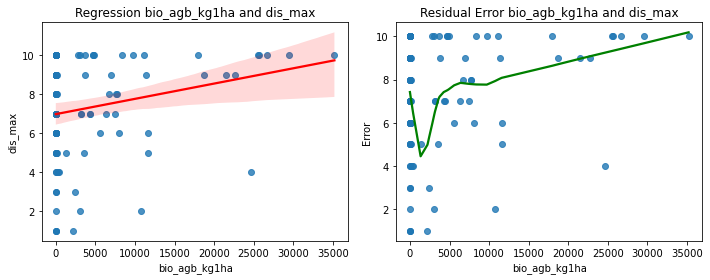

dis_mean
slope:  -1.4021351750437358e-06
intersept:  5.583323840295233
r2:  -0.004236592994847209
P_value:  0.9657870817105515
std error:  3.26099873855931e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


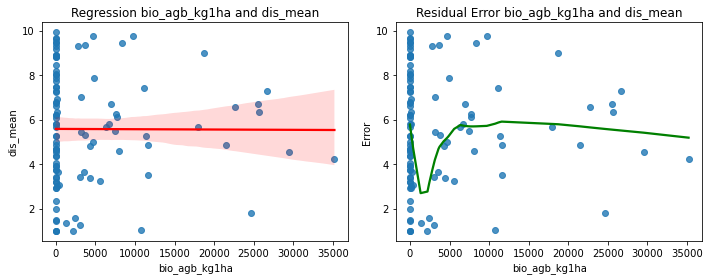

dis_sum
slope:  -0.00019581442580534288
intersept:  102.7462673955326
r2:  -0.026804620975195183
P_value:  0.7860630055636856
std error:  0.000719548921963273


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


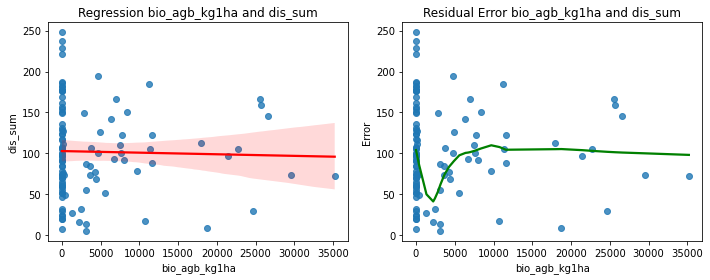

dis_sum.1
slope:  3.758873792026434e-05
intersept:  0.7926568533689905
r2:  0.45689155112664226
P_value:  9.623379261687588e-07
std error:  7.210790808111721e-06


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


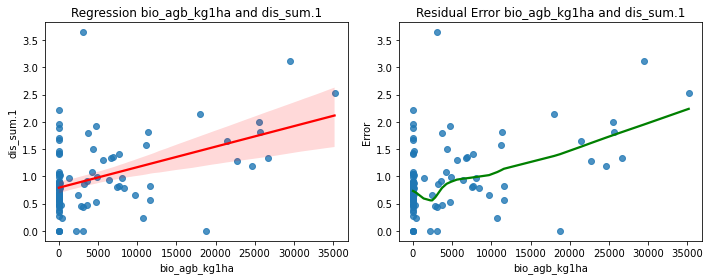

dis_sum.2
slope:  -0.00019581442580534288
intersept:  102.7462673955326
r2:  -0.026804620975195183
P_value:  0.7860630055636856
std error:  0.000719548921963273


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


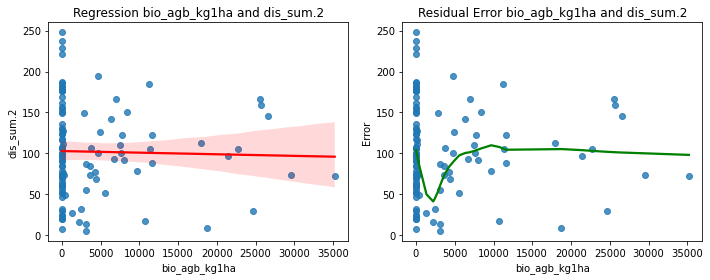

dis_sum.3
slope:  3.758873792026434e-05
intersept:  0.7926568533689905
r2:  0.45689155112664226
P_value:  9.623379261687588e-07
std error:  7.210790808111721e-06


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


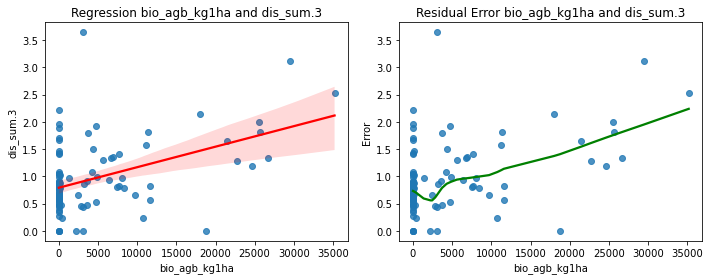

dis_med
slope:  -6.571910802133447e-06
intersept:  5.5368074487287195
r2:  -0.018742246182850354
P_value:  0.8494904705318537
std error:  3.454419835382791e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


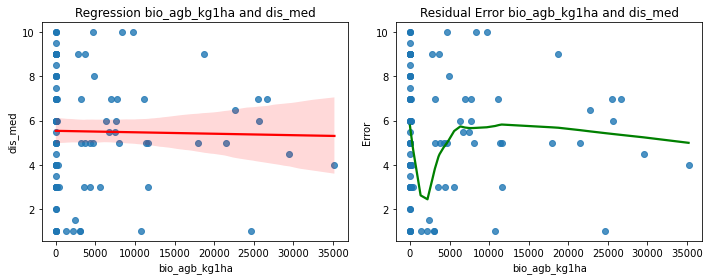

dis_major
slope:  -4.3762583708358184e-05
intersept:  5.476920802219738
r2:  -0.11751390319834885
P_value:  0.2325223665628254
std error:  3.6439758838477604e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


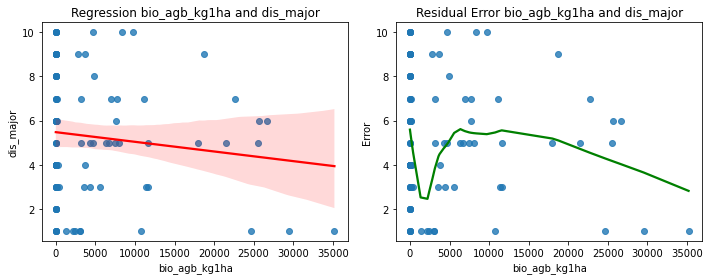

dis_minor
slope:  -1.536673282107357e-05
intersept:  5.359033908460684
r2:  -0.04116481532903915
P_value:  0.6767213203113431
std error:  3.6750942329032295e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


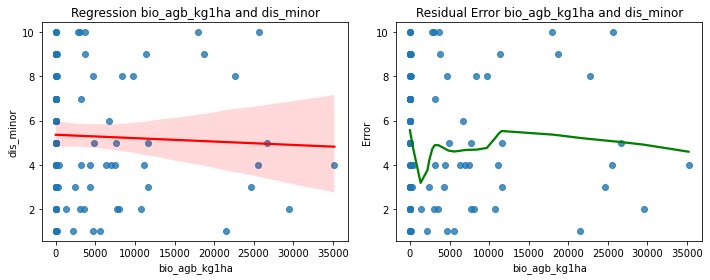

dka_min
slope:  -3.551408495804183e-05
intersept:  1.89981957561564
r2:  -0.09727086283974688
P_value:  0.323573199048492
std error:  3.580427649750717e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


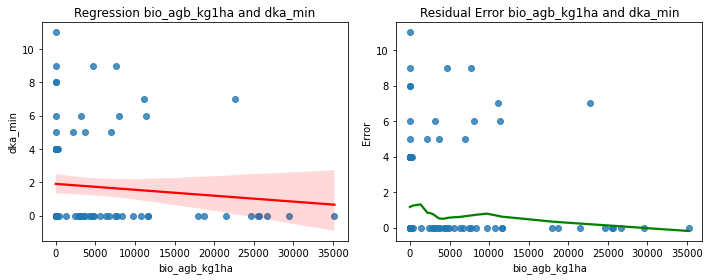

dka_max
slope:  -6.590030827182535e-05
intersept:  3.073588654580815
r2:  -0.15341260938817902
P_value:  0.118180074941237
std error:  4.1825006988180136e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


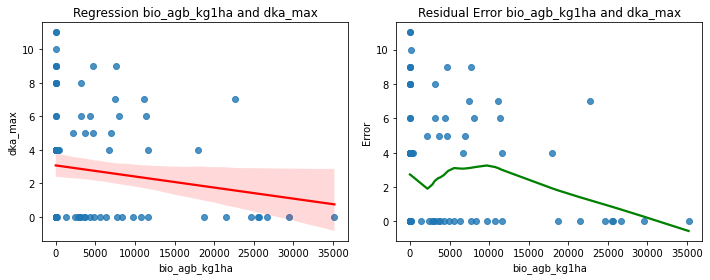

dka_mean
slope:  -4.467328026197446e-05
intersept:  2.458820655291282
r2:  -0.120011865250188
P_value:  0.222674273145159
std error:  3.6412857779473614e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


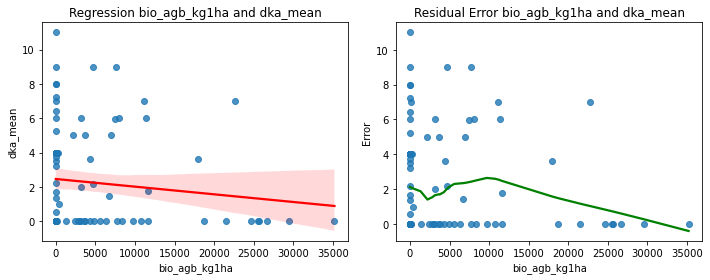

dka_med
slope:  -4.706032577306845e-05
intersept:  2.4525163166915016
r2:  -0.11989848650760046
P_value:  0.22311478809567137
std error:  3.839532328657568e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


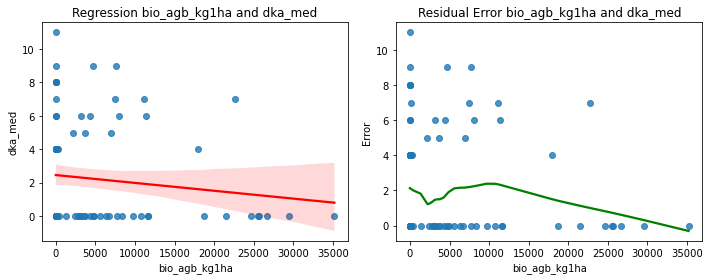

dka_major
slope:  -4.5020875737847655e-05
intersept:  2.4154780022153917
r2:  -0.11593495808049682
P_value:  0.2389021540651758
std error:  3.8005151414538296e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


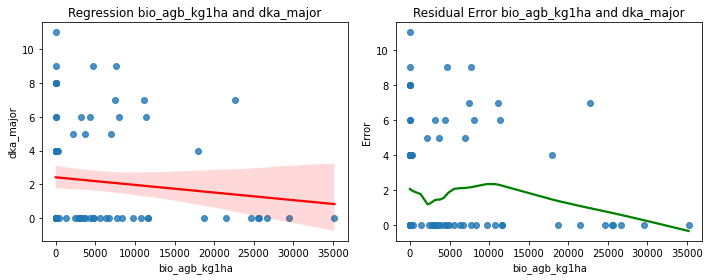

dka_minor
slope:  -5.2314617421578e-05
intersept:  2.4838535990288446
r2:  -0.127962238535421
P_value:  0.1932988805594301
std error:  3.9951909246573924e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


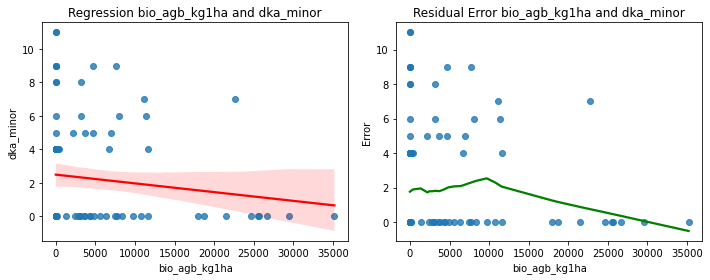

stc_min
slope:  0.00029513493079158466
intersept:  1.955683929976209
r2:  0.715148867060942
P_value:  1.0365071426082637e-17
std error:  2.842270661680811e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


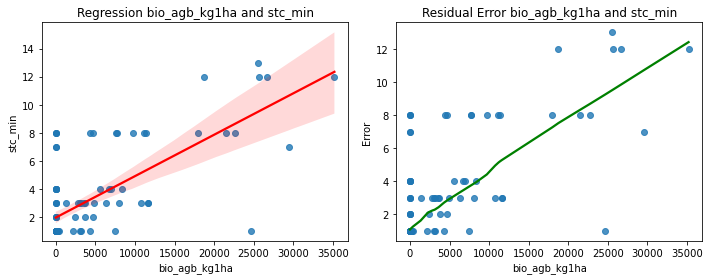

stc_max
slope:  0.0003239447035087699
intersept:  3.3884595699819595
r2:  0.6455262582696173
P_value:  1.0524926794811291e-13
std error:  3.776441848601768e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


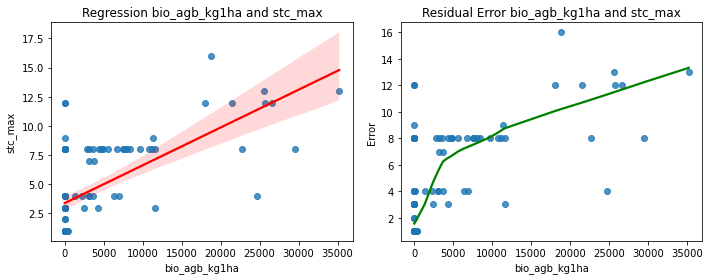

stc_mean
slope:  0.0003094388991125976
intersept:  2.6728002404193933
r2:  0.6916622100116284
P_value:  3.1131750776139676e-16
std error:  3.18370228008994e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


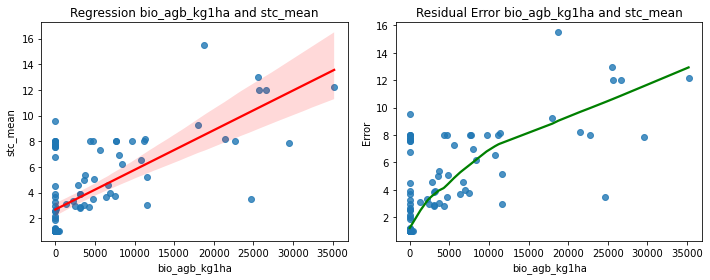

stc_med
slope:  0.0003105574455964154
intersept:  2.667847011054935
r2:  0.683289054738829
P_value:  9.695735309537633e-16
std error:  3.269864494040035e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


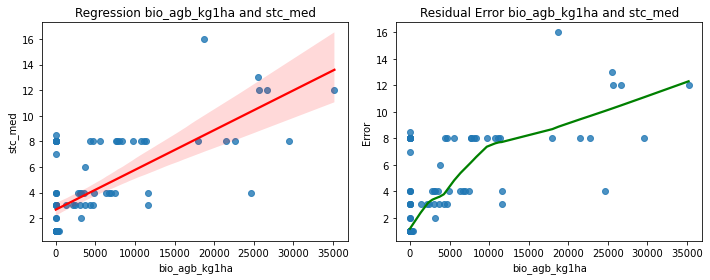

stc_major
slope: 

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.0003147267784487041
intersept:  2.5600616122385924
r2:  0.6932808807829097
P_value:  2.488246914497162e-16
std error:  3.223597327651779e-05


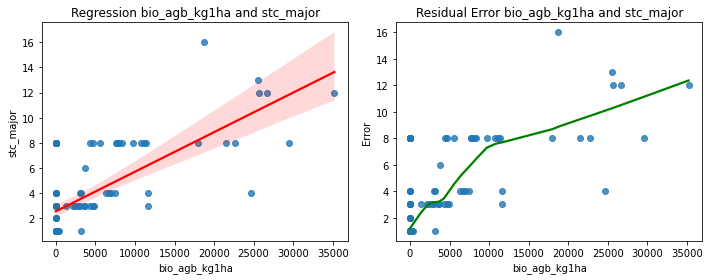

stc_minor
slope:  0.00030297714417327977
intersept:  2.8278884664298545
r2:  0.6502411406510863
P_value:  6.077105256370263e-14
std error:  3.4879871674386056e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


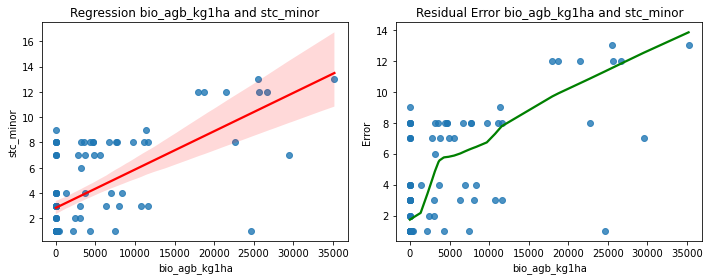

fpca2_min
slope:  0.0008734605278718466
intersept:  2.659622184271362
r2:  0.7420610114753379
P_value:  1.3446294995602606e-19
std error:  7.774549521023119e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


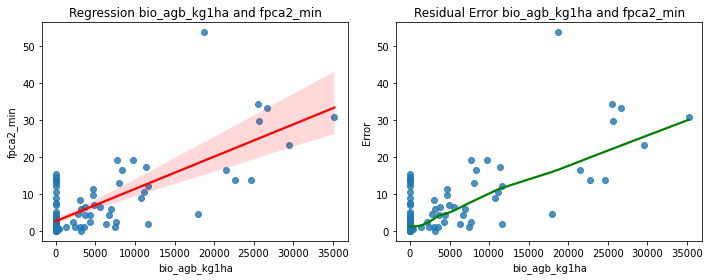

fpca2_max
slope:  0.0013194402063375847
intersept:  9.429626771193076
r2:  0.7097676100161612
P_value:  2.328300756274465e-17
std error:  0.00012903169631554932


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


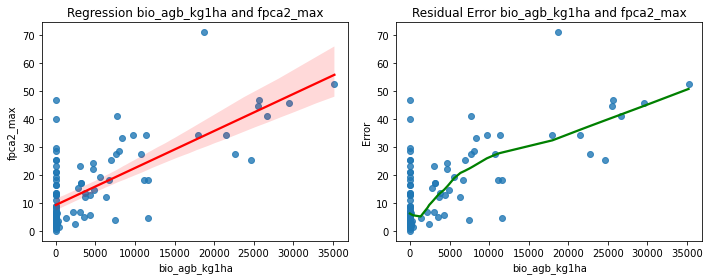

fpca2_mean
slope:  0.0010861212734901472
intersept:  5.404536689700185
r2:  0.7414215407349378
P_value:  1.5001459434788015e-19
std error:  9.685959215745843e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


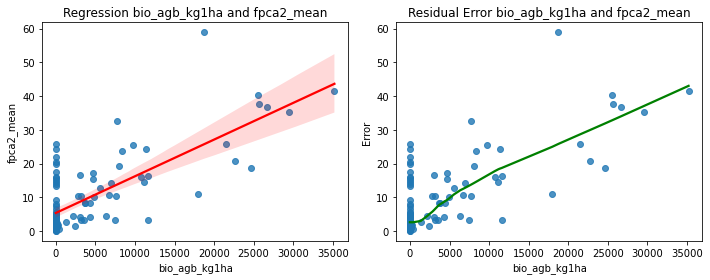

fpca2_med
slope:  0.0010811481855679556
intersept:  5.259133790391993
r2:  0.7332954329252548
P_value:  5.864188496762165e-19
std error:  9.877320680872092e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


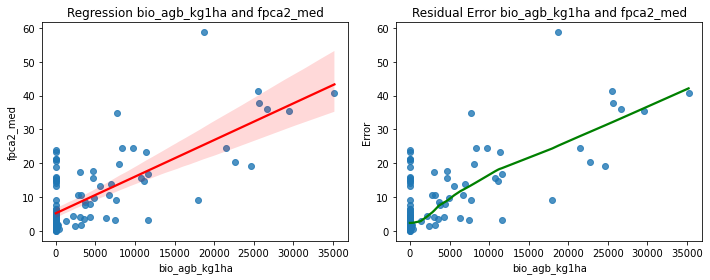

fpca2_std
slope:  0.00010890033232857163
intersept:  1.8352472832165927
r2:  0.42763483556062365
P_value:  5.363918747370444e-06
std error:  2.268206976032418e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


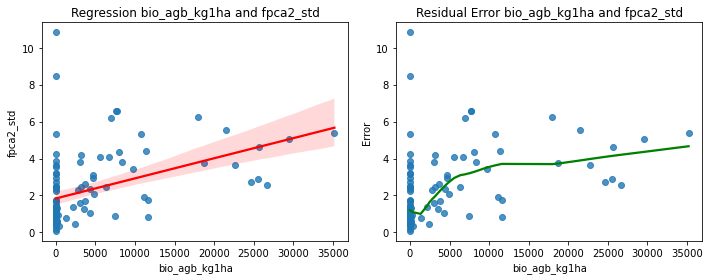

fpca2_p25
slope:  0.0010134833238672832
intersept:  4.118568871945705
r2:  0.7477535590079262
P_value:  5.002941635022382e-20
std error:  8.867314810957502e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


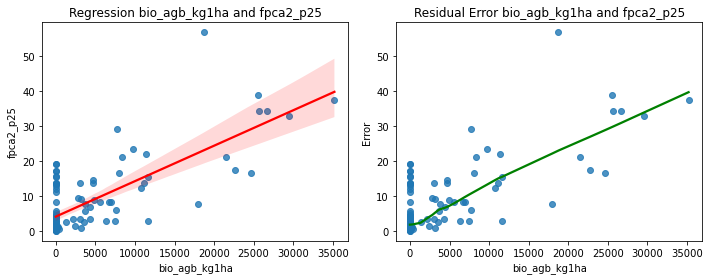

fpca2_p50
slope:  0.0010811481855679556
intersept:  5.259133790391993
r2:  0.7332954329252548
P_value:  5.864188496762165e-19
std error:  9.877320680872092e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


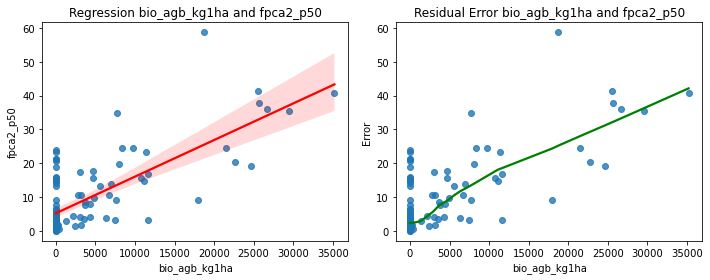

fpca2_p75
slope:  0.0011457901273090956
intersept:  6.460036795889156
r2:  0.7247508738598551
P_value:  2.332977555129968e-18
std error:  0.00010733067905967645


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


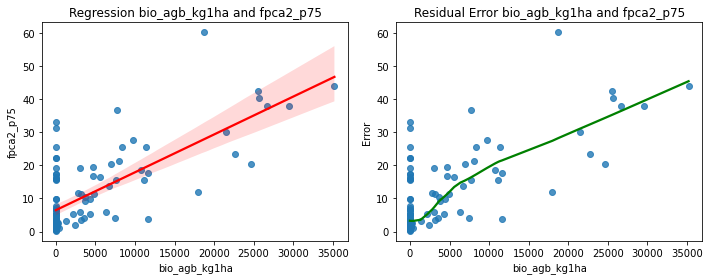

fpca2_p95
slope:  0.0012646447281824062
intersept:  8.164933766582903
r2:  0.7274042445702207
P_value:  1.5279429486086781e-18
std error:  0.00011755216455955195


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


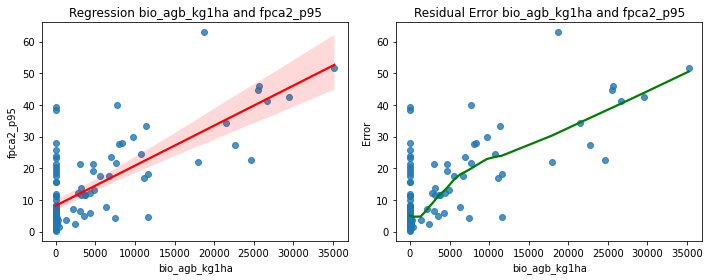

fpca2_p99
slope:  0.001307543037521405
intersept:  9.174012622042042
r2:  0.7139184181370447
P_value:  1.2492445627853249e-17
std error:  0.00012636558609195752


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


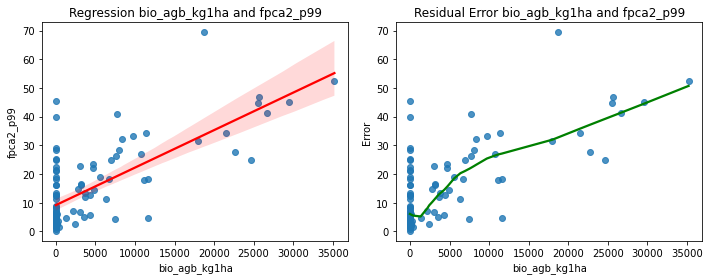

h99a2_min
slope:  0.0003261494745901408
intersept:  5.49313015385423
r2:  0.6565141030685823
P_value:  2.882571478300726e-14
std error:  3.692376981646843e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


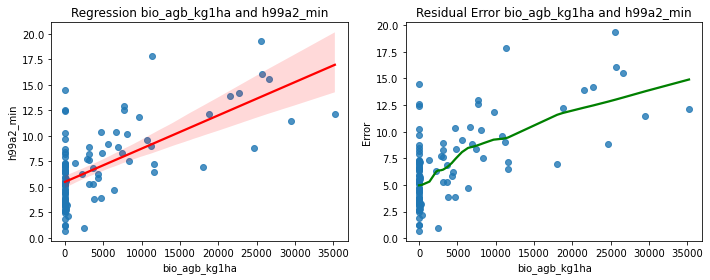

h99a2_max
slope:  0.000438467776910508
intersept:  9.328273981348445
r2:  0.6705345229098889
P_value:  5.097843096262756e-15
std error:  4.780029886077036e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


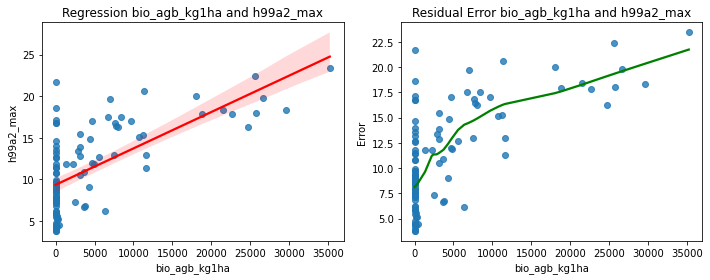

h99a2_mean
slope:  0.0003608369148390621
intersept:  7.438735132301467
r2:  0.646850091539578
P_value:  9.029588058465368e-14
std error:  4.191749177476434e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


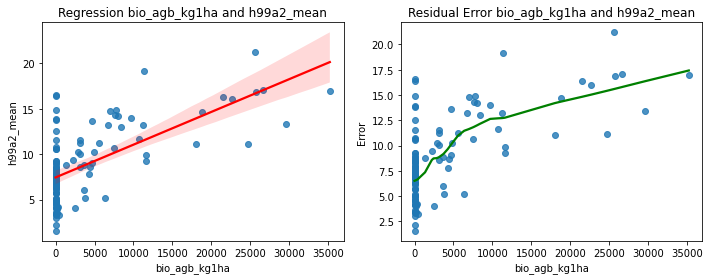

h99a2_med
slope:  0.0003536271467310885
intersept:  7.458836796797734
r2:  0.6284350231515354
P_value:  7.129348743089923e-13
std error:  4.31289819410607e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


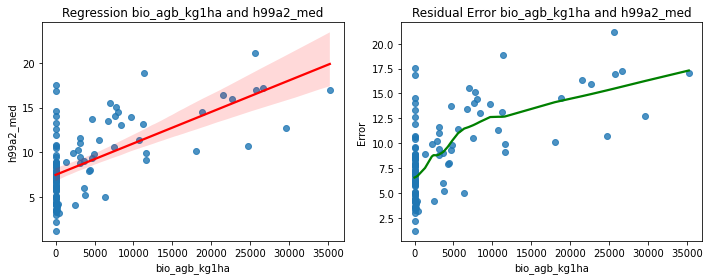

h99a2_std
slope:  2.2742234744567186e-05
intersept:  1.0619193977613417
r2:  0.24671882006050397
P_value:  0.011174208148037
std error:  8.801872283417552e-06


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


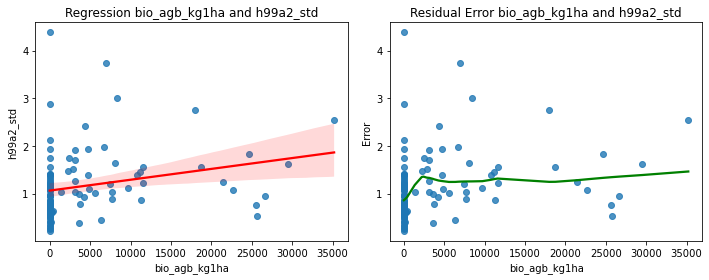

h99a2_p25
slope:  0.00034804470945859223
intersept:  6.712975972799454
r2:  0.6493303473051775
P_value:  6.762373597461927e-14
std error:  4.016554277176572e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


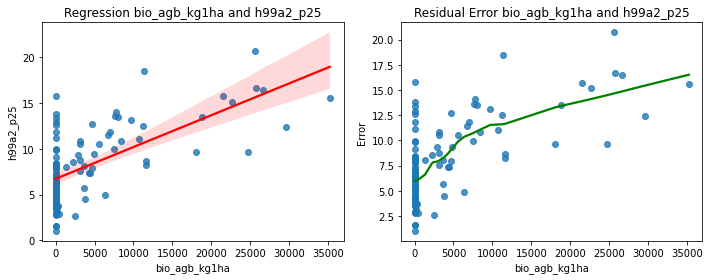

h99a2_p50
slope:  0.0003536271467310885
intersept:  7.458836796797734
r2:  0.6284350231515354
P_value:  7.129348743089923e-13
std error:  4.31289819410607e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


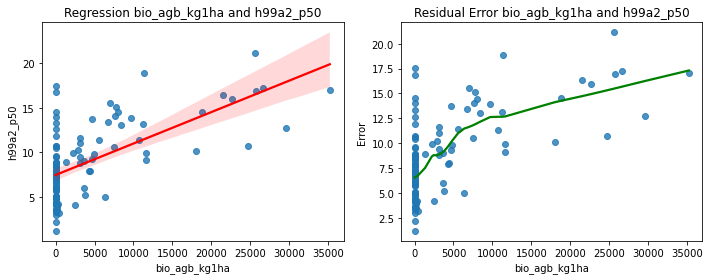

h99a2_p75
slope:  0.00037150297094327756
intersept:  8.192312624487615
r2:  0.6245870519148485
P_value:  1.0792406566916495e-12
std error:  4.5769568658814314e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


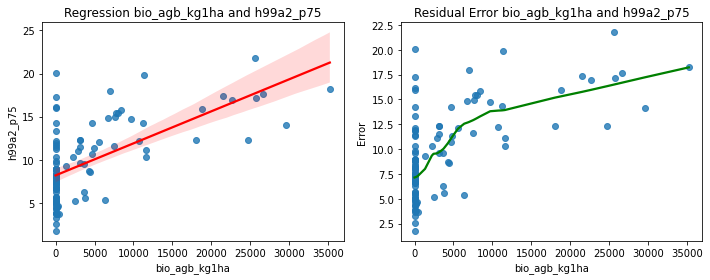

h99a2_p95
slope:  0.00039285239601982296
intersept:  8.95615607471862
r2:  0.6366558400954536
P_value:  2.8832336014737747e-13
std error:  4.6886071010720434e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


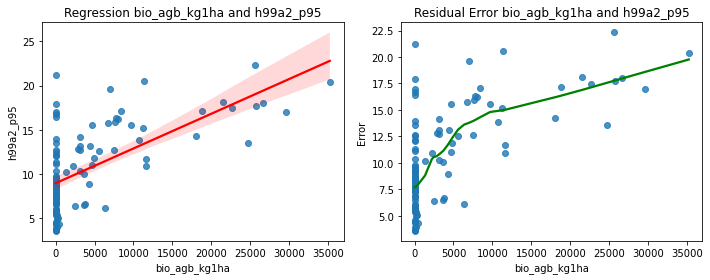

h99a2_p99
slope:  0.0004292570391417617
intersept:  9.253594298903767
r2:  0.665217486987161
P_value:  9.942020954712745e-15
std error:  4.747358401487519e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


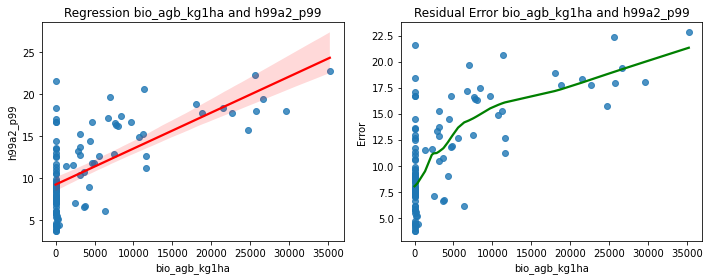

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


psB1a
slope:  -0.015122197910628622
intersept:  609.294946795843
r2:  -0.49470013866153045
P_value:  8.137440042978898e-08
std error:  0.0026176157797248908


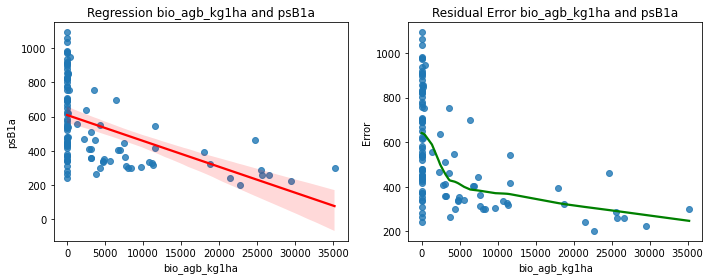

psB2a
slope:  -0.02275229653346796
intersept:  926.5498283850119
r2:  -0.5269822358140995
P_value:  7.693752191080655e-09
std error:  0.0036154833767762886


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


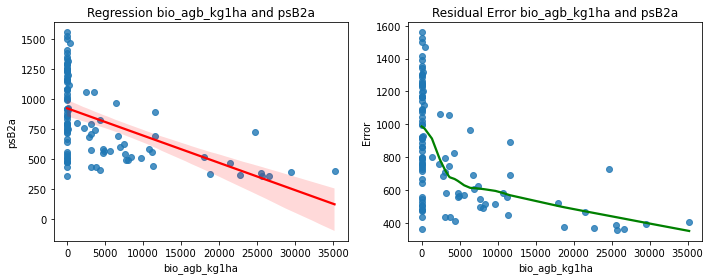

psB3a
slope:  -0.03815866910348022
intersept:  1361.5359462407569
r2:  -0.5834438676761159
P_value:  6.50896092365449e-11
std error:  0.005233757900711539


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


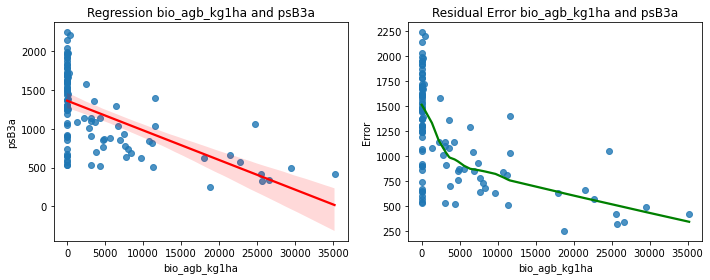

psB4a
slope:  -0.018661156297519348
intersept:  2420.166121826242
r2:  -0.3307337255387806
P_value:  0.0005690502843595114
std error:  0.005246703318129729


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


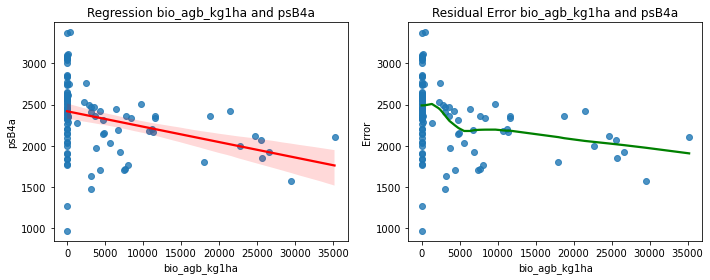

psB5a
slope:  -0.05435822488504417
intersept:  2917.152816147825
r2:  -0.6220858121823416
P_value:  1.4087786651550438e-12
std error:  0.00674108600896636


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


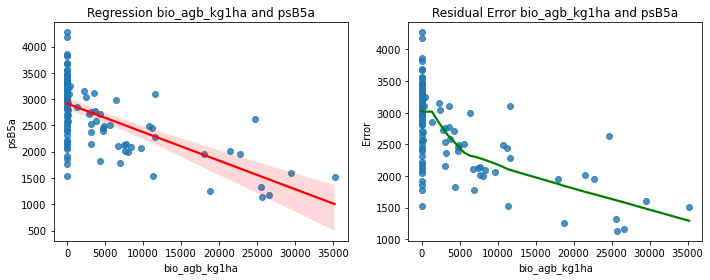

psB6a
slope:  -0.046448823826088975
intersept:  1942.68487174663
r2:  -0.6268925377445027
P_value:  8.424228173335171e-13
std error:  0.005687997670526528


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


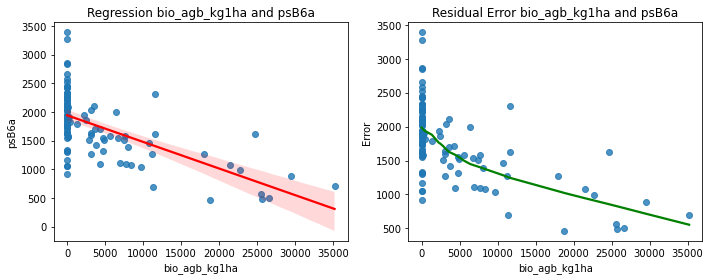

ratio32a
slope:  -120.82086783951537
intersept:  14776574.361812502
r2:  -0.5429076614567634
P_value:  2.188032910338731e-09
std error:  18.414897544779073


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


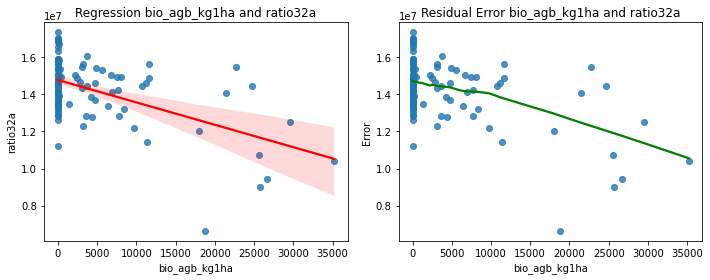

ratio42a
slope:  849.2155518663086
intersept:  27791315.34801885
r2:  0.6625727971762077
P_value:  1.3790382047446995e-14
std error:  94.59019183302232


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


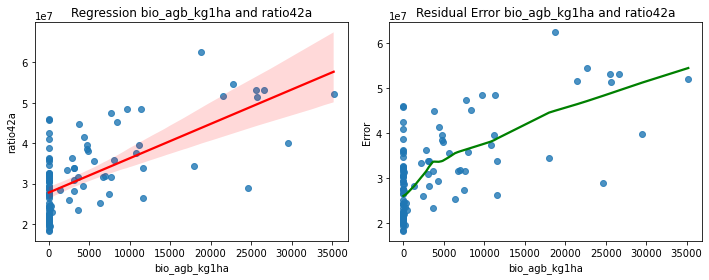

ratio43a
slope: 

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 1034.7430675024611
intersept:  18621640.54359991
r2:  0.6880005626144164
P_value:  5.140432643779317e-16
std error:  107.54452820117378


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


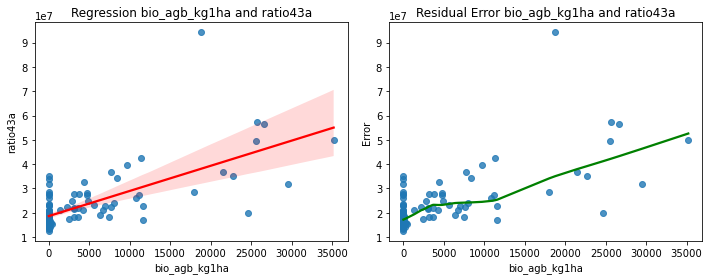

ratio52a
slope:  229.25488553897802
intersept:  33836596.15678703
r2:  0.2145151434443207
P_value:  0.027987471296982053
std error:  102.85192074007546


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


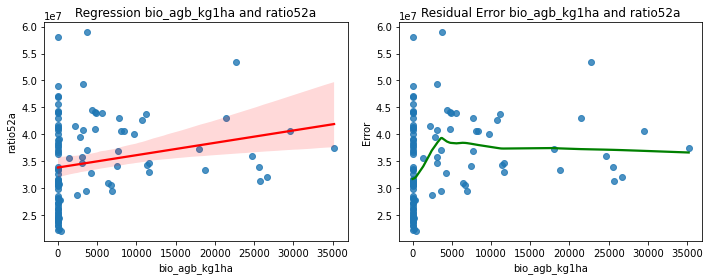

ratio53a


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  450.86474402591426
intersept:  22896666.566573635
r2:  0.5119662603074768
P_value:  2.3760070973055755e-08
std error:  74.53878284422655


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


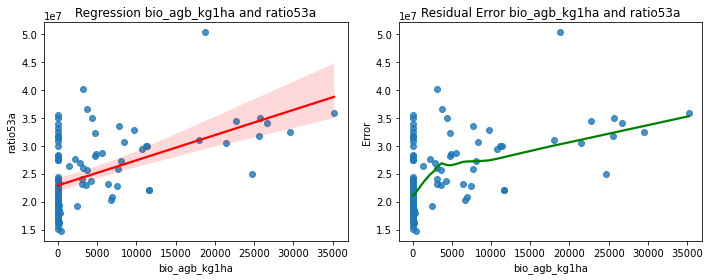

ratio54a


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -157.76396887284963
intersept:  12159679.53600284
r2:  -0.5905271478970554
P_value:  3.347900523483091e-11
std error:  21.24381168055508


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


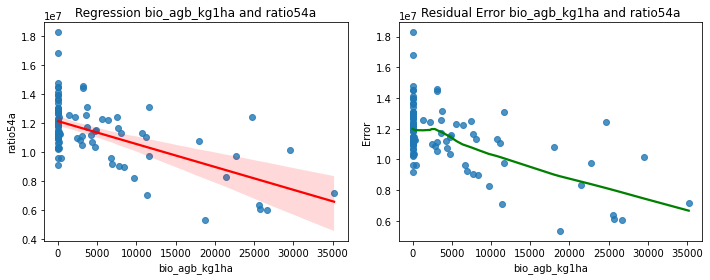

ratio62a
slope:  -84.91099122164208
intersept:  22372889.626427673
r2:  -0.11881831479529434
P_value:  0.22734245212325443
std error:  69.91565399809963


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


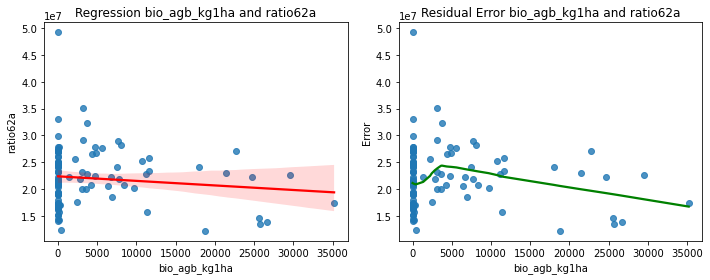

ratio63a
slope:  72.44587494722555
intersept:  15189671.360979754
r2:  0.155110382014635
P_value:  0.11411585238546051
std error:  45.463818836360886


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


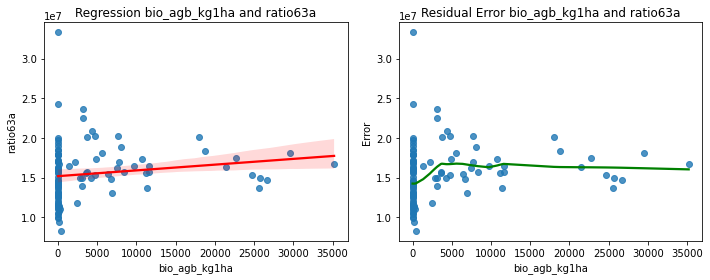

ratio64a
slope:  -157.8548055127561
intersept:  8170027.811076728
r2:  -0.523914255242416
P_value:  9.730437101381665e-09
std error:  25.287263523804047


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


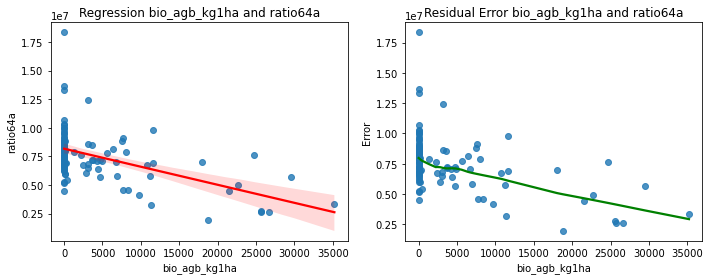

ratio65a
slope:  -66.63608861787755
intersept:  6681394.600327631
r2:  -0.48631159898360765
P_value:  1.4446980807430526e-07
std error:  11.797257800514418


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


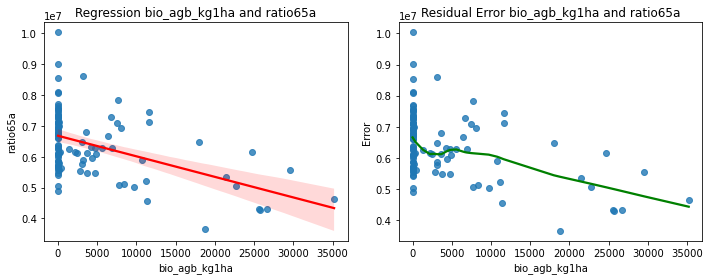

GSAVIa
slope:  22.645011431455988
intersept:  2680630.119073365
r2:  0.36096889647522623
P_value:  0.00015499598256069332
std error:  5.764600945763239


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


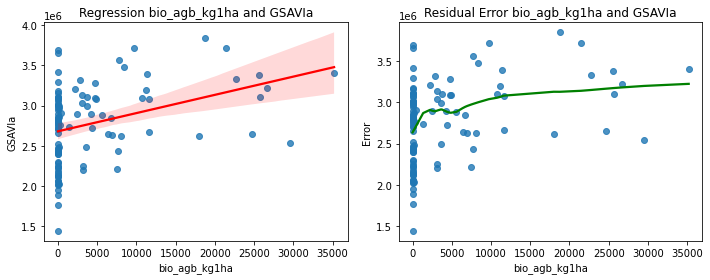

GNDVIa
slope:  83.64596758612085
intersept:  4569664.920190475
r2:  0.5891936158367271
P_value:  3.798973873117708e-11
std error:  11.302522036391062


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


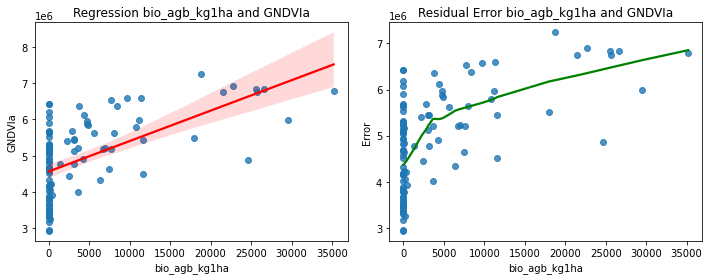

CVIa
slope:  619.8016105702903
intersept:  41451107.11971454
r2:  0.39198578851026017
P_value:  3.544375213434474e-05
std error:  143.3303073207595


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


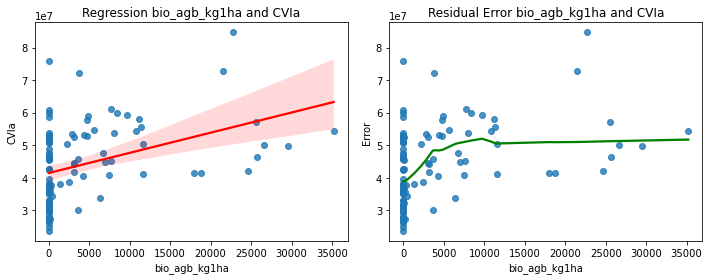

NDGIa
slope:  49.058828692977265
intersept:  -1920015.8084568386
r2:  0.55889704766574
P_value:  5.785783975804445e-10
std error:  7.1720853090816385


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


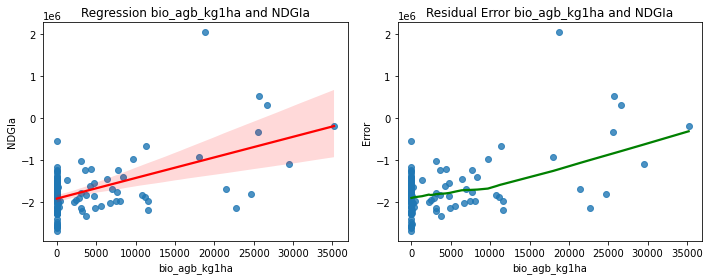

RIa
slope:  -49.058828692977265
intersept:  1920015.8084568386
r2:  -0.55889704766574
P_value:  5.785783975804445e-10
std error:  7.1720853090816385


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


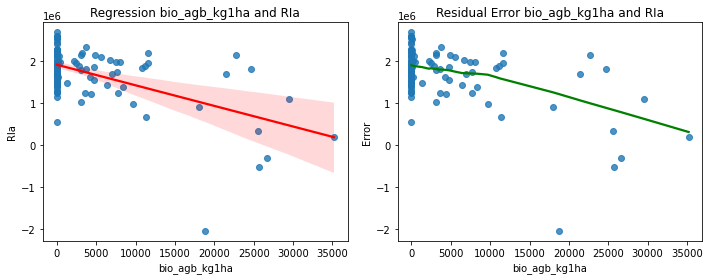

NBRa
slope:  123.83669213427194
intersept:  1095228.6537498839
r2:  0.6178234068054126
P_value:  2.2064384236722196e-12
std error:  15.529732397008567


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


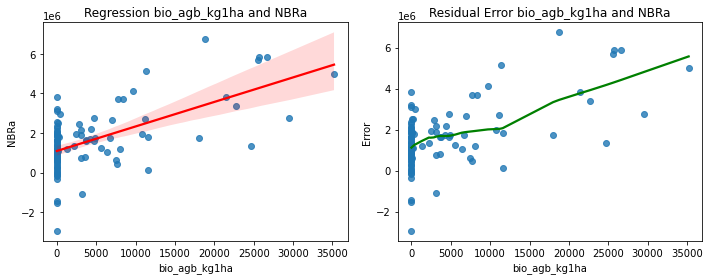

NDIIa
slope:  81.70804035742631
intersept:  -950478.7665043533
r2:  0.6437617967189169
P_value:  1.289486207316223e-13
std error:  9.569972044595584


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


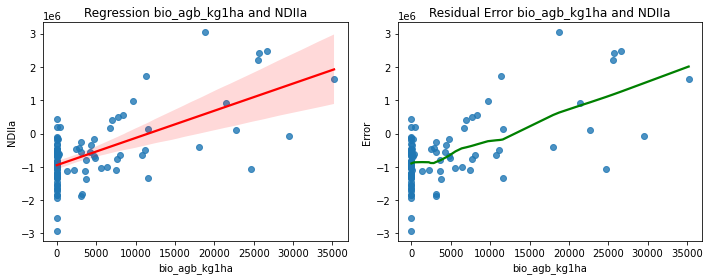

GDVIa
slope:  4.086258808387928
intersept:  1493616.6303774114
r2:  0.11287649414270691
P_value:  0.2516037755674692
std error:  3.544208586695441


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


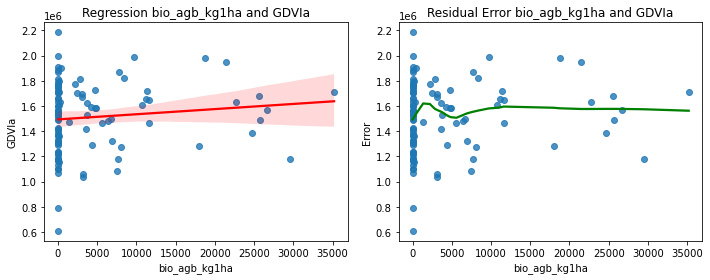

MSAVIa
slope:  45.14931414616474
intersept:  1611876.6360055897
r2:  0.5800961237279392
P_value:  8.862915132838872e-11
std error:  6.246680266138538


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


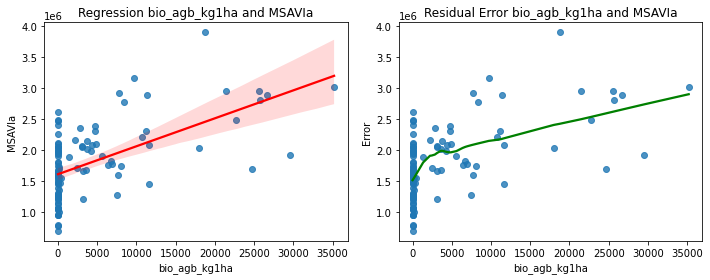

DVIa
slope:  19.49669844046734
intersept:  1058639.365991199
r2:  0.4730153924897223
P_value:  3.4795258186301686e-07
std error:  3.57824271944113


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


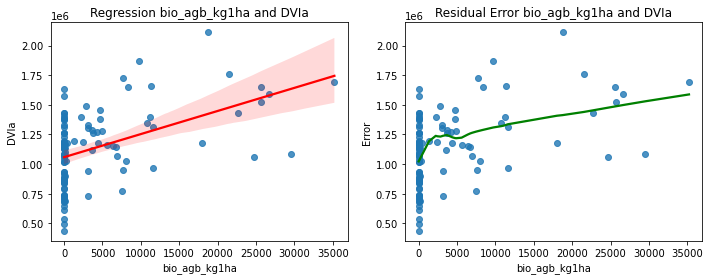

SAVIa
slope:  50.97709311237498
intersept:  1821808.8046805798
r2:  0.5962382003899245
P_value:  1.9356326288659694e-11
std error:  6.763136000881346


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


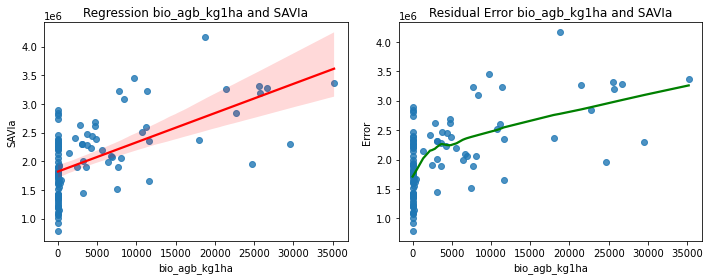

NDVIa
slope:  129.8913876090232
intersept:  2933391.175926459
r2:  0.6781864590546376
P_value:  1.9023080495361737e-15
std error:  13.868672509553283


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


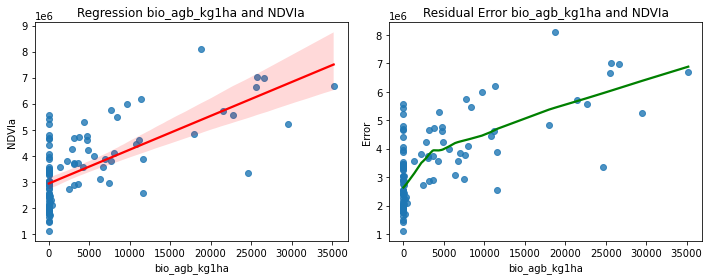

MSRa
slope:  290.5764446505751
intersept:  3612233.767104251
r2:  0.7054578190297464
P_value:  4.3936159537320235e-17
std error:  28.765040001300612


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


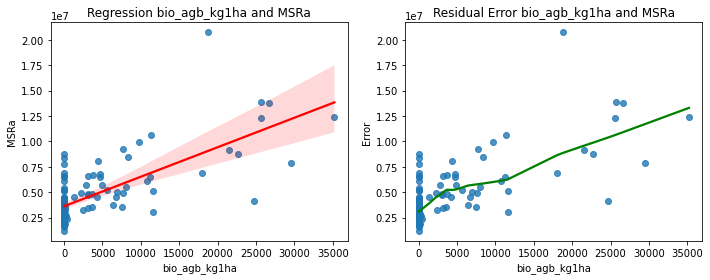

In [92]:
for i in df.columns[1:]:
    print(i)
    value_x = 'bio_agb_kg1ha'
    value_y_loop = str(i)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(df[value_x], df[value_y_loop], line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y_loop])

    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(df[value_x], df[value_y_loop], lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

#     print("slope: ", slope)
#     print("intersept: ", intercept)
#     print("r2: ", r_value)
#     print("P_value: ", p_value)
#     print("std error: ", std_err)

slope:  0.00039285239601982296
intersept:  8.95615607471862
r2:  0.6366558400954536
P_value:  2.8832336014737747e-13
std error:  4.6886071010720434e-05


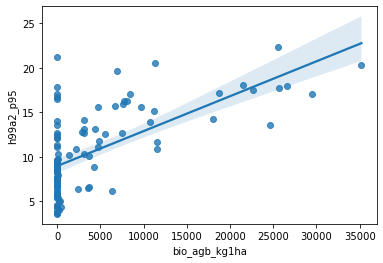

In [93]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b2_dbi_mean'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

slope:  0.0003242836339799174
intersept:  10.243018403806554
r2:  0.4636853312425515
P_value:  1.578274303893543e-09
std error:  5.042511511719326e-05


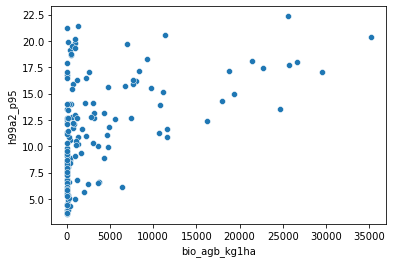

In [37]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b3_dbi_mean'
sns.scatterplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [38]:
# randomly split data into train and test datasets, the user needs to define the variables 

# Two example of how you can call the predictor variables 

#xdata1 = df4[df4.columns[12:]].astype('float32')

#xdata1 = df[['psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa', 'psB2d', 'psB3d', 'psB4d', 'psB5d', 'psB6d', 'ratio32d', 'ratio42d', 'ratio43d', 'ratio52d', 'ratio53d', 'ratio54d', 'ratio62d', 'ratio63d', 'ratio64d', 'ratio65d', 'GSAVId', 'GNDVId', 'CVId', 'NDGId', 'RId', 'NBRd', 'NDIId', 'GDVId', 'MSAVId', 'DVId', 'SAVId', 'NDVId', 'MSRd']].astype('float32')
#xdata1 = df[['psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']]
xdata1 = df.iloc[:, 1:].astype('float32')
ydata1 = df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(107, 40) (107,)
(46, 40) (46,)


### Plot up Histograms of Lidar meanCHM for train and test datasets

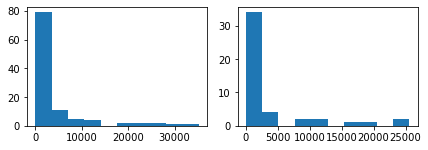

In [39]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [40]:
rng = np.random.RandomState(1)
rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
rfrModel_1

In [59]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
# rfrModel_1,

In [42]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1,

In [43]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [44]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [60]:
np.nan_to_num(X_1)

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.426028e+06,
        2.064682e+06, 2.330361e+06],
       [6.000000e+00, 8.000000e+00, 7.800000e+00, ..., 2.457827e+06,
        3.994823e+06, 5.265843e+06],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.936818e+06,
        2.877857e+06, 3.446723e+06],
       ...,
       [8.000000e+00, 8.000000e+00, 8.000000e+00, ..., 2.568727e+06,
        5.197395e+06, 7.788780e+06],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.898845e+06,
        3.038365e+06, 3.685350e+06],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.415407e+06,
        2.105393e+06, 2.382952e+06]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [61]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\ensemble\_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 0.87
Fitted model mse = 5954947.67
n = 107


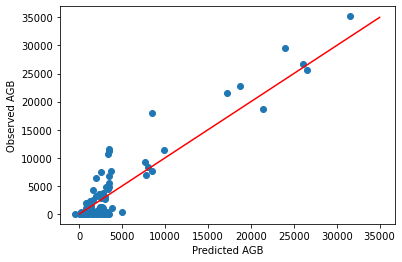

In [62]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')
plt.show()

          band                      n
6    fpca2_min       0.31758836912582
25   h99a2_p99     0.1373717673656353
8   fpca2_mean     0.1275569202104676
28      GNDVIa    0.10191994966503817
12   fpca2_p50    0.09318757648727563
29        CVIa   0.038508284700684715
2     stc_mean    0.03741951524970331
11   fpca2_p25    0.03337137211653587
14   fpca2_p95   0.030005570872639633
23   h99a2_p75   0.022372429791432207
5    stc_minor    0.01288669708014561
34       GDVIa   0.010280506738895941
10   fpca2_std    0.00899459034125772
18  h99a2_mean   0.006462766417996563
17   h99a2_max   0.006396762409337806
27      GSAVIa     0.0056263006413452
32        NBRa  0.0031161327543680695
4    stc_major    0.00210920957236158
21   h99a2_p25  0.0018248189399671926
36        DVIa  0.0013562364886712632
31         RIa  0.0008301237442435086
37       SAVIa  0.0008140992861770604
0      stc_min                    0.0
30       NDGIa                    0.0
33       NDIIa                    0.0
38       NDV

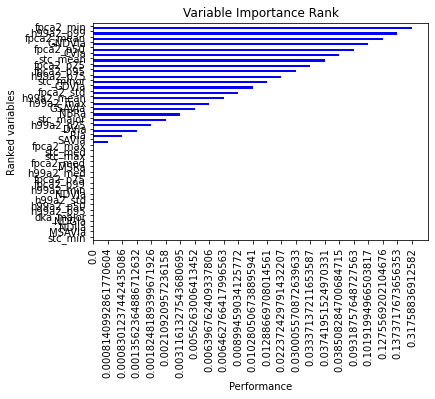

In [63]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 

In [64]:
dfsort.to_csv(os.path.join(output_, "rf_variable_score3.csv"))

In [65]:
variable_imp_list = dfsort.band.to_list()

In [66]:
var_not_imp = variable_imp_list[20:]

In [67]:
print(list(var_not_imp))

['RIa', 'SAVIa', 'stc_min', 'NDGIa', 'NDIIa', 'NDVIa', 'MSAVIa', 'h99a2_std', 'dka_major', 'h99a2_p95', 'h99a2_p50', 'stc_max', 'h99a2_med', 'h99a2_min', 'fpca2_p99', 'fpca2_p75', 'fpca2_med', 'fpca2_max', 'stc_med', 'MSRa']


In [73]:
print(list(df_ml))

['bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', 'b6_dbi_p

In [75]:
df

band                      n
0      stc_min                    0.0
1      stc_max                    0.0
2     stc_mean    0.03741951524970331
3      stc_med                    0.0
4    stc_major    0.00210920957236158
5    stc_minor    0.01288669708014561
6    fpca2_min       0.31758836912582
7    fpca2_max                    0.0
8   fpca2_mean     0.1275569202104676
9    fpca2_med                    0.0
10   fpca2_std    0.00899459034125772
11   fpca2_p25    0.03337137211653587
12   fpca2_p50    0.09318757648727563
13   fpca2_p75                    0.0
14   fpca2_p95   0.030005570872639633
15   fpca2_p99                    0.0
16   h99a2_min                    0.0
17   h99a2_max   0.006396762409337806
18  h99a2_mean   0.006462766417996563
19   h99a2_med                    0.0
20   h99a2_std                    0.0
21   h99a2_p25  0.0018248189399671926
22   h99a2_p50                    0.0
23   h99a2_p75   0.022372429791432207
24   h99a2_p95                    0.0
25   h99a2_p99     0.1373717673656353
26   dka_major                    0.0
27      GSAVIa     0.0056263006413452
28      GNDVIa    0.10191994966503817
29        CVIa   0.038508284700684715
30       NDGIa                    0.0
31         RIa  0.0008301237442435086
32        NBRa  0.0031161327543680695
33       NDIIa                    0.0
34       GDVIa   0.010280506738895941
35      MSAVIa                    0.0
36        DVIa  0.0013562364886712632
37       SAVIa  0.0008140992861770604
38       NDVIa                    0.0
39        MSRa                    0.0

In [74]:
# Drop multiple columns
df.drop(var_not_imp, axis = 1, inplace=True)

KeyError: "['RIa' 'SAVIa' 'stc_min' 'NDGIa' 'NDIIa' 'NDVIa' 'MSAVIa' 'h99a2_std'\n 'dka_major' 'h99a2_p95' 'h99a2_p50' 'stc_max' 'h99a2_med' 'h99a2_min'\n 'fpca2_p99' 'fpca2_p75' 'fpca2_med' 'fpca2_max' 'stc_med' 'MSRa'] not found in axis"

In [69]:
df_ml

bio_agb_kg1ha  b1_dja_min  b1_dja_max  b1_dja_mean  b1_dja_med  \
0             0.00       21.00       29.00        26.38       27.50   
1             0.00        2.00        5.00         3.55        4.00   
2             0.00        1.00        6.00         3.96        4.00   
3             0.00        0.00        6.00         3.08        3.00   
4             0.00        0.00        5.00         2.32        2.00   
..             ...         ...         ...          ...         ...   
175         978.74       33.00       44.00        38.44       37.50   
176        1358.28       29.00       39.00        33.30       33.00   
177        1157.05       15.00       30.00        24.16       26.00   
178         970.20       15.00       29.00        22.56       22.00   
179        9995.51         nan         nan          nan         nan   

     b1_dja_std  b1_dja_p25  b1_dja_p50  b1_dja_p75  b1_dja_p95  ...  \
0          2.60       24.75       27.50       28.25       29.00  ...   
1          0.92        3.00        4.00        4.00        5.00  ...   
2          1.31        3.00        4.00        5.00        6.00  ...   
3          1.98        1.00        3.00        5.00        6.00  ...   
4          1.43        1.00        2.00        3.00        4.80  ...   
..          ...         ...         ...         ...         ...  ...   
175        3.02       36.00       37.50       41.00       43.25  ...   
176        3.08       30.75       33.00       35.50       38.05  ...   
177        4.05       21.00       26.00       27.00       29.80  ...   
178        3.37       21.00       22.00       25.00       27.50  ...   
179         nan         nan         nan         nan         nan  ...   

       ratio62a    ratio63a    ratio64a   ratio65a     GSAVIa     GNDVIa  \
0   27838627.00 19347372.00  8511666.00 6102090.00 3057714.00 5316822.00   
1   17886742.00 13948915.00  9711039.00 7542150.00 1893939.00 2963362.00   
2   17324113.00 12639563.00  8590740.00 7074162.00 2220727.00 3370787.00   
3   15070490.00 11154980.00  8238401.00 6765597.00 1955797.00 2932068.00   
4   19316731.00 14332747.00 10006712.00 7078812.00 2029169.00 3176915.00   
..          ...         ...         ...        ...        ...        ...   
175 20488230.00 17968650.00  3902790.00 5029966.00 3566597.00 6800595.00   
176 20924623.00 15525727.00  4270769.00 5351727.00 3428010.00 6613636.00   
177 22697029.00 14935956.00  5854307.00 6119887.00 3365981.00 5903457.00   
178 20458866.00 13969993.00  5434482.00 5881541.00 3205485.00 5805012.00   
179 15334831.00 17889723.00  2808480.00 4523881.00 4015068.00 6907999.00   

           CVIa       NBRa      GDVIa       DVIa  
0   47037401.00  803085.00 1653000.00 1334000.00  
1   23627843.00  145478.00 1100000.00  731000.00  
2   27643702.00  758167.00 1320000.00  839000.00  
3   24723335.00  965693.00 1174000.00  677000.00  
4   26029558.00   -2046.00 1178000.00  738000.00  
..          ...        ...        ...        ...  
175 59838832.00 4386747.00 1828000.00 1768000.00  
176 66182154.00 4017258.00 1746000.00 1590000.00  
177 59036117.00 2615783.00 1810000.00 1483000.00  
178 55188162.00 2958064.00 1691000.00 1407000.00  
179 46855190.00 5614599.00 2185000.00 2255000.00  

[171 rows x 152 columns]

In [70]:
y_2

array([   73.92  ,     0.    ,   857.01  ,     0.    ,  9708.965 ,
       24670.8   ,   689.92  ,     0.    ,    55.44  ,   989.555 ,
        8031.45  ,   388.08  , 16241.866 ,  3156.902 ,  1358.28  ,
       11596.2   ,   129.36  ,  3086.16  ,   129.36  ,  3648.393 ,
         258.72  ,   129.36  ,  2247.63  ,     0.    ,  1700.16  ,
        4743.2   ,   258.72  ,   388.08  ,     0.    , 10763.322 ,
         166.32  ,  1796.6666,  2120.0667, 19404.    ,     0.    ,
           0.    ,   646.8   ,   970.2   ,     0.    , 25585.07  ,
           0.    ,   388.08  ,   129.36  ,     0.    ,   129.36  ,
           0.    ], dtype=float32)

### Predict the selected model on the test data

In [71]:
# plt.scatter(y2_predict, y_2)
# plt.show()

Predicted data r2 = 0.12648194955060754
MSE = 35251002.813
RMSE = 5937.255
bias = 158.269
n = 46


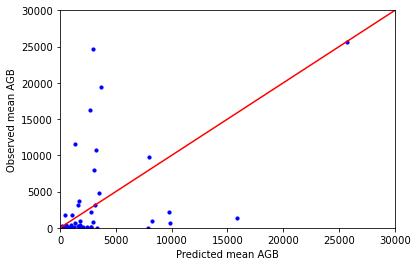

In [72]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import cPickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    cPickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv('combined_val_data_l5_l7_l8.csv', header=0)
print df.shape 

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['chm'] >= 4)]

print (df1.shape)

In [ ]:
xdata2 = df1[['dem', 'ratio42', 'psB5', 'CVI', 'ratio43', 'psB2', 'ratio54', 'SAVI', 'ratio53', 'ratio52', 'psB3', 'GSAVI', 'ratio65', 'ratio63', 'ratio62', 'psB4', 'ratio32']].astype('float32')

ydata1 = df1[['chm']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print len(ydata1)

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()